In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read excel file with sheet name

dict_df=pd.read_excel('C:/Users/user/Downloads/Capstone Project-CC/Customer Churn Data.xlsx',sheet_name=['Meta Data','Data for DSBA'])

#since we are reading 2 sheets from excel, this returns dict of data frame

In [4]:
#Get data frame from dict

df_meta=dict_df.get('Meta Data')

In [5]:
df_meta.head()

Unnamed: 0 Unnamed: 1                       Unnamed: 2
0         NaN   Variable                      Description
1         NaN  AccountID        account unique identifier
2         NaN      Churn      account churn flag (Target)
3         NaN     Tenure                Tenure of account
4         NaN  City_Tier  Tier of primary customer's city

In [6]:
df=dict_df.get('Data for DSBA')

In [7]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [8]:
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

In [9]:
df.shape

(11260, 19)

In [10]:
print('The number of rows:',df.shape[0],'\n''The number of columns:', df.shape[1])


The number of rows: 11260 
The number of columns: 19


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [12]:
df.describe()

AccountID         Churn     City_Tier  CC_Contacted_LY  \
count  11260.00000  11260.000000  11148.000000     11158.000000   
mean   25629.50000      0.168384      1.653929        17.867091   
std     3250.62635      0.374223      0.915015         8.853269   
min    20000.00000      0.000000      1.000000         4.000000   
25%    22814.75000      0.000000      1.000000        11.000000   
50%    25629.50000      0.000000      1.000000        16.000000   
75%    28444.25000      0.000000      3.000000        23.000000   
max    31259.00000      1.000000      3.000000       132.000000   

       Service_Score  CC_Agent_Score   Complain_ly  
count   11162.000000    11144.000000  10903.000000  
mean        2.902526        3.066493      0.285334  
std         0.725584        1.379772      0.451594  
min         0.000000        1.000000      0.000000  
25%         2.000000        2.000000      0.000000  
50%         3.000000        3.000000      0.000000  
75%         3.000000        4.000000      1.000000  
max         5.000000        5.000000      1.000000

In [13]:
pd.options.display.float_format = '{:.2f}'.format 

df.describe(include='all').T

count  unique         top    freq     mean     std  \
AccountID               11260.00     NaN         NaN     NaN 25629.50 3250.63   
Churn                   11260.00     NaN         NaN     NaN     0.17    0.37   
Tenure                  11158.00   38.00        1.00 1351.00      NaN     NaN   
City_Tier               11148.00     NaN         NaN     NaN     1.65    0.92   
CC_Contacted_LY         11158.00     NaN         NaN     NaN    17.87    8.85   
Payment                    11151       5  Debit Card    4587      NaN     NaN   
Gender                     11152       4        Male    6328      NaN     NaN   
Service_Score           11162.00     NaN         NaN     NaN     2.90    0.73   
Account_user_count      11148.00    7.00        4.00 4569.00      NaN     NaN   
account_segment            11163       7       Super    4062      NaN     NaN   
CC_Agent_Score          11144.00     NaN         NaN     NaN     3.07    1.38   
Marital_Status             11048       3     Married    5860      NaN     NaN   
rev_per_month           11158.00   59.00        3.00 1746.00      NaN     NaN   
Complain_ly             10903.00     NaN         NaN     NaN     0.29    0.45   
rev_growth_yoy          11260.00   20.00       14.00 1524.00      NaN     NaN   
coupon_used_for_payment 11260.00   20.00        1.00 4373.00      NaN     NaN   
Day_Since_CC_connect    10903.00   24.00        3.00 1816.00      NaN     NaN   
cashback                10789.00 5693.00      155.62   10.00      NaN     NaN   
Login_device               11039       3      Mobile    7482      NaN     NaN   

                             min      25%      50%      75%      max  
AccountID               20000.00 22814.75 25629.50 28444.25 31259.00  
Churn                       0.00     0.00     0.00     0.00     1.00  
Tenure                       NaN      NaN      NaN      NaN      NaN  
City_Tier                   1.00     1.00     1.00     3.00     3.00  
CC_Contacted_LY             4.00    11.00    16.00    23.00   132.00  
Payment                      NaN      NaN      NaN      NaN      NaN  
Gender                       NaN      NaN      NaN      NaN      NaN  
Service_Score               0.00     2.00     3.00     3.00     5.00  
Account_user_count           NaN      NaN      NaN      NaN      NaN  
account_segment              NaN      NaN      NaN      NaN      NaN  
CC_Agent_Score              1.00     2.00     3.00     4.00     5.00  
Marital_Status               NaN      NaN      NaN      NaN      NaN  
rev_per_month                NaN      NaN      NaN      NaN      NaN  
Complain_ly                 0.00     0.00     0.00     1.00     1.00  
rev_growth_yoy               NaN      NaN      NaN      NaN      NaN  
coupon_used_for_payment      NaN      NaN      NaN      NaN      NaN  
Day_Since_CC_connect         NaN      NaN      NaN      NaN      NaN  
cashback                     NaN      NaN      NaN      NaN      NaN  
Login_device                 NaN      NaN      NaN      NaN      NaN

In [14]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [15]:
df.isnull().sum().sum()

2676

In [16]:
df.size

213940

In [17]:
2676/213940

0.012508179863513134

In [18]:
#checking for duplicates

df.duplicated().sum()

0

In [19]:
df['cashback'].dtype

dtype('O')

In [20]:
object_columns = df.select_dtypes(include=['object'])

In [21]:
object_columns

Tenure      Payment  Gender Account_user_count account_segment  \
0          4   Debit Card  Female                  3           Super   
1          0          UPI    Male                  4    Regular Plus   
2          0   Debit Card    Male                  4    Regular Plus   
3          0   Debit Card    Male                  4           Super   
4          0  Credit Card    Male                  3    Regular Plus   
...      ...          ...     ...                ...             ...   
11255     10  Credit Card    Male                  2           Super   
11256     13  Credit Card    Male                  5             HNI   
11257      1   Debit Card    Male                  2           Super   
11258     23  Credit Card    Male                  5           Super   
11259      8  Credit Card    Male                  2           Super   

      Marital_Status rev_per_month rev_growth_yoy coupon_used_for_payment  \
0             Single             9             11                       1   
1             Single             7             15                       0   
2             Single             6             14                       0   
3             Single             8             23                       0   
4             Single             3             11                       1   
...              ...           ...            ...                     ...   
11255        Married             9             19                       1   
11256        Married             7             16                       1   
11257        Married             7             22                       1   
11258        Married             7             16                       2   
11259        Married             5             13                       2   

      Day_Since_CC_connect cashback Login_device  
0                        5   159.93       Mobile  
1                        0   120.90       Mobile  
2                        3      NaN       Mobile  
3                        3   134.07       Mobile  
4                        3   129.60       Mobile  
...                    ...      ...          ...  
11255                    4   153.71     Computer  
11256                    8   226.91       Mobile  
11257                    4   191.42       Mobile  
11258                    9   179.90     Computer  
11259                    3   175.04       Mobile  

[11260 rows x 12 columns]

In [22]:
#checking unique values for data cleaning

for object_columns in df.columns:
    ubj=df[object_columns].unique()
    print(object_columns)
    #print('\n')
    print(ubj)
    print('\n')
    

AccountID
[20000 20001 20002 ... 31257 31258 31259]


Churn
[1 0]


Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]


City_Tier
[ 3.  1. nan  2.]


CC_Contacted_LY
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]


Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' 'F' nan 'M']


Service_Score
[ 3.  2.  1. nan  0.  4.  5.]


Account_user_count
[3 4 nan 5 2 '@' 1 6]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']


CC_Agent_Score
[ 2.  3.  5.  4. nan  1.]


Marital_Status
['Single' 'Divorced' 'Married' nan]


rev_per_month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 1

* Here we're having some incorrect values in some of the columns like below
* we need to treat those column such as Gender, Login_device,coupon_used_for_payment,rev_growth_yoy,account_segment,Account_user_count

In [23]:
#checking unique values data cleaning: After

for object_columns in df.columns:
    ubj=df[object_columns].unique()
    print(object_columns)
    #print('\n')
    print(ubj)
    print('\n')

AccountID
[20000 20001 20002 ... 31257 31258 31259]


Churn
[1 0]


Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]


City_Tier
[ 3.  1. nan  2.]


CC_Contacted_LY
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]


Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' 'F' nan 'M']


Service_Score
[ 3.  2.  1. nan  0.  4.  5.]


Account_user_count
[3 4 nan 5 2 '@' 1 6]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']


CC_Agent_Score
[ 2.  3.  5.  4. nan  1.]


Marital_Status
['Single' 'Divorced' 'Married' nan]


rev_per_month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 1

In [24]:
df['cashback'].mode()

0   155.62
Name: cashback, dtype: object

In [25]:
#checking mode for categorical features modes

for object_columns in df.columns:
    ubj=df[object_columns].mode()
    print(object_columns)
    #print('\n')
    print(ubj)
    print('\n')

AccountID
0        20000
1        20001
2        20002
3        20003
4        20004
         ...  
11255    31255
11256    31256
11257    31257
11258    31258
11259    31259
Name: AccountID, Length: 11260, dtype: int64


Churn
0    0
Name: Churn, dtype: int64


Tenure
0    1
Name: Tenure, dtype: object


City_Tier
0   1.00
Name: City_Tier, dtype: float64


CC_Contacted_LY
0   14.00
Name: CC_Contacted_LY, dtype: float64


Payment
0    Debit Card
Name: Payment, dtype: object


Gender
0    Male
Name: Gender, dtype: object


Service_Score
0   3.00
Name: Service_Score, dtype: float64


Account_user_count
0    4
Name: Account_user_count, dtype: object


account_segment
0    Super
Name: account_segment, dtype: object


CC_Agent_Score
0   3.00
Name: CC_Agent_Score, dtype: float64


Marital_Status
0    Married
Name: Marital_Status, dtype: object


rev_per_month
0    3
Name: rev_per_month, dtype: object


Complain_ly
0   0.00
Name: Complain_ly, dtype: float64


rev_growth_yoy
0    14
Name: rev_

#### Data Cleaning

* we are going to replace the mistyped or different values with nan values
* After that will use KNN imputer to impute those missing & nan values 

In [26]:
#Data celaning(Before): gender

df['Gender'].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [27]:
df['Gender'].replace({'F': 'Female', 'M': 'Male'}, inplace=True)

In [28]:
#Data celaning(After): gender

df['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [29]:
#Data celaning(Before): account_segment

df['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [30]:
df['account_segment'].replace({'Regular +': 'Regular Plus', 'Super +': 'Super Plus'}, inplace=True)

In [31]:
#Data celaning(After): account_segment

df['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [32]:
#Data celaning(before): Login_device

df['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [33]:
# Replace '&&&&' with NaN using replace()

df['Login_device'] = df['Login_device'].replace('&&&&', np.nan)

In [34]:
#Data celaning(after): Login_device

df['Login_device'].value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

In [35]:
#Data celaning(before): Day_Since_CC_connect

df['Day_Since_CC_connect'].value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [36]:
# Replace '$' with NaN using replace()

df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].replace('$',np.nan)

In [37]:
#Data celaning(after): Day_Since_CC_connect

df['Day_Since_CC_connect'].value_counts()

3.00     1816
2.00     1574
1.00     1256
8.00     1169
0.00      964
7.00      911
4.00      893
9.00      622
5.00      479
10.00     339
6.00      229
11.00     183
12.00     146
13.00     117
14.00      74
15.00      37
17.00      34
16.00      26
18.00      26
30.00       2
31.00       2
47.00       2
46.00       1
Name: Day_Since_CC_connect, dtype: int64

In [38]:
#before
df['Tenure'].value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64

In [39]:
df['Tenure']=df['Tenure'].replace('#',np.nan)

In [40]:
#after
df['Tenure'].value_counts()

1.00     1351
0.00     1231
8.00      519
9.00      496
7.00      450
10.00     423
3.00      410
5.00      403
4.00      403
11.00     388
6.00      363
12.00     360
13.00     359
2.00      354
14.00     345
15.00     311
16.00     291
19.00     273
18.00     253
20.00     217
17.00     215
21.00     170
23.00     169
22.00     151
24.00     147
30.00     137
28.00     137
99.00     131
27.00     131
26.00     122
25.00     114
29.00     114
31.00      96
50.00       2
60.00       2
51.00       2
61.00       2
Name: Tenure, dtype: int64

In [41]:
#Before

df['Account_user_count'].value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [42]:
df['Account_user_count']=df['Account_user_count'].replace('@',np.nan)

In [43]:
#After

df['Account_user_count'].value_counts()

4.00    4569
3.00    3261
5.00    1699
2.00     526
1.00     446
6.00     315
Name: Account_user_count, dtype: int64

In [44]:
#Before

df['rev_growth_yoy'].value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [45]:
#rev_growth_yoy

df['rev_growth_yoy']=df['rev_growth_yoy'].replace('$',np.nan)


In [46]:
#Before

df['rev_growth_yoy'].value_counts()

14.00    1524
13.00    1427
15.00    1283
12.00    1210
16.00     949
18.00     708
17.00     704
19.00     619
20.00     562
11.00     523
21.00     433
22.00     403
23.00     345
24.00     229
25.00     188
26.00      98
27.00      35
28.00      14
4.00        3
Name: rev_growth_yoy, dtype: int64

In [47]:
#Before

df['coupon_used_for_payment'].value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [48]:
#coupon_used_for_payment#

df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace(['#','$','*'],np.nan)

In [49]:
#After

df['coupon_used_for_payment'].value_counts()

1.00     4373
2.00     2656
0.00     2150
3.00      698
4.00      424
5.00      284
6.00      234
7.00      184
8.00       88
9.00       34
10.00      34
11.00      30
12.00      26
13.00      22
14.00      12
15.00       4
16.00       4
Name: coupon_used_for_payment, dtype: int64

In [50]:
#checking unique values After :data cleaning

for object_columns in df.columns:
    ubj=df[object_columns].unique()
    print(object_columns)
    #print('\n')
    print(ubj)
    print('\n')

AccountID
[20000 20001 20002 ... 31257 31258 31259]


Churn
[1 0]


Tenure
[ 4.  0.  2. 13. 11. nan  9. 99. 19. 20. 14.  8. 26. 18.  5. 30.  7.  1.
 23.  3. 29.  6. 28. 24. 25. 16. 10. 15. 22. 27. 12. 21. 17. 50. 60. 31.
 51. 61.]


City_Tier
[ 3.  1. nan  2.]


CC_Contacted_LY
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]


Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' nan]


Service_Score
[ 3.  2.  1. nan  0.  4.  5.]


Account_user_count
[ 3.  4. nan  5.  2.  1.  6.]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' nan 'Super Plus']


CC_Agent_Score
[ 2.  3.  5.  4. nan  1.]


Marital_Status
['Single' 'Divorced' 'Married' nan]


rev_per_month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140

Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]
 
 mode=1
 
 Account_user_count
[3 4 nan 5 2 '@' 1 6]

mode=4

rev_per_month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101
 136 125 14 13 12 115 23 122 117 131 104 15 25 135 111 109 100 103]
 
 mode=3
 
 rev_growth_yoy
[11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26 '$' 4 27 28]

mode=14

coupon_used_for_payment
[1 0 4 2 9 6 11 7 12 10 5 3 13 15 8 '#' '$' 14 '*' 16]

mode=1

Day_Since_CC_connect
[5 0 3 7 2 1 8 6 4 15 nan 11 10 9 13 12 17 16 14 30 '$' 46 18 31 47]

mode=3

Login_device
['Mobile' 'Computer' '&&&&' nan]

mode= mobile

### 3. Exploratory Data Analysis

* After Univarite & bivariate analysis
####  3. a) Removal of unwanted variables (if applicable)

In [51]:
df=df.drop(['AccountID'],axis=1)
df.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1    4.00       3.00             6.00   Debit Card  Female   
1      1    0.00       1.00             8.00          UPI    Male   
2      1    0.00       1.00            30.00   Debit Card    Male   
3      1    0.00       3.00            15.00   Debit Card    Male   
4      1    0.00       1.00            12.00  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0           3.00                3.00           Super            2.00   
1           3.00                4.00    Regular Plus            3.00   
2           2.00                4.00    Regular Plus            3.00   
3           2.00                4.00           Super            5.00   
4           2.00                3.00    Regular Plus            5.00   

  Marital_Status rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single             9         1.00           11.00   
1         Single             7         1.00           15.00   
2         Single             6         1.00           14.00   
3         Single             8         0.00           23.00   
4         Single             3         0.00           11.00   

   coupon_used_for_payment  Day_Since_CC_connect cashback Login_device  
0                     1.00                  5.00   159.93       Mobile  
1                     0.00                  0.00   120.90       Mobile  
2                     0.00                  3.00      NaN       Mobile  
3                     0.00                  3.00   134.07       Mobile  
4                     1.00                  3.00   129.60       Mobile

* Here we are dropping the the unwanted variable ('AccountID') from this dataset.
* It can abe used find is there any duplicates present in the data set.

In [52]:
df.describe().T

count  mean   std  min   25%   50%   75%    max
Churn                   11260.00  0.17  0.37 0.00  0.00  0.00  0.00   1.00
Tenure                  11042.00 11.03 12.88 0.00  2.00  9.00 16.00  99.00
City_Tier               11148.00  1.65  0.92 1.00  1.00  1.00  3.00   3.00
CC_Contacted_LY         11158.00 17.87  8.85 4.00 11.00 16.00 23.00 132.00
Service_Score           11162.00  2.90  0.73 0.00  2.00  3.00  3.00   5.00
Account_user_count      10816.00  3.69  1.02 1.00  3.00  4.00  4.00   6.00
CC_Agent_Score          11144.00  3.07  1.38 1.00  2.00  3.00  4.00   5.00
Complain_ly             10903.00  0.29  0.45 0.00  0.00  0.00  1.00   1.00
rev_growth_yoy          11257.00 16.19  3.76 4.00 13.00 15.00 19.00  28.00
coupon_used_for_payment 11257.00  1.79  1.97 0.00  1.00  1.00  2.00  16.00
Day_Since_CC_connect    10902.00  4.63  3.70 0.00  2.00  3.00  8.00  47.00

#### a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

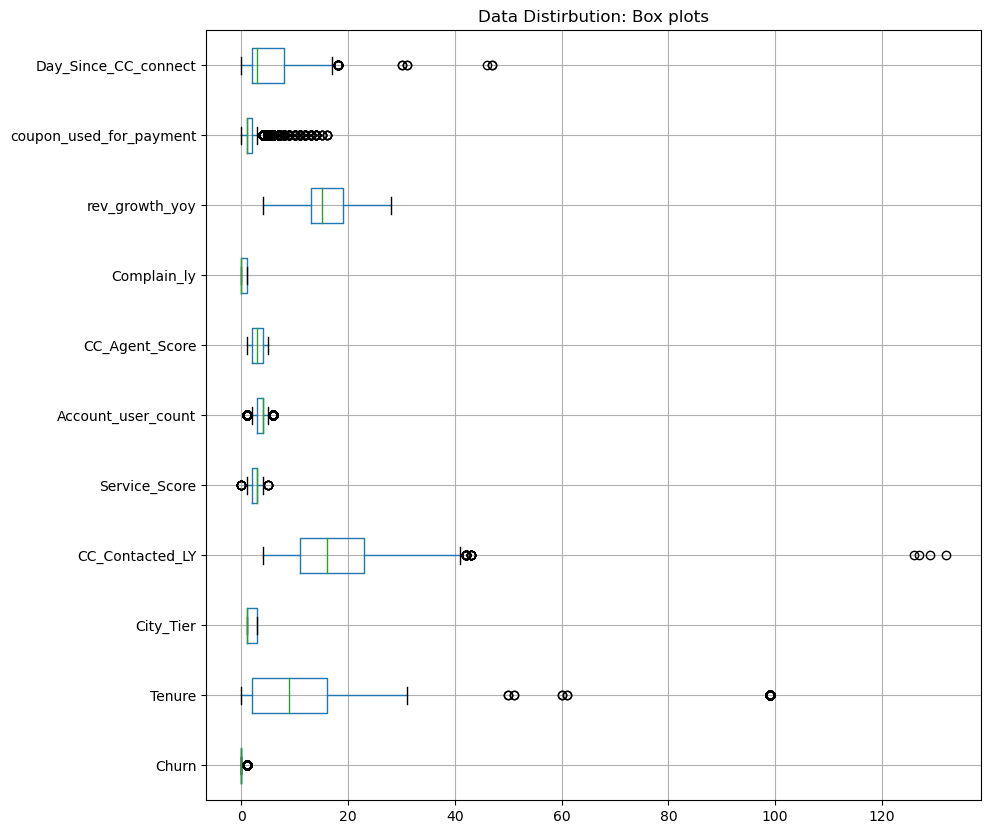

In [53]:
#continuous variable distribution

### BOXplots

plt.figure(figsize=(10,10))
plt.title('Data Distirbution: Box plots')
df.boxplot(vert=0)
plt.show()

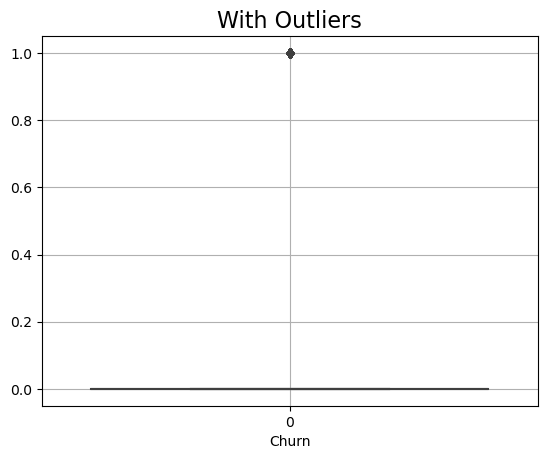

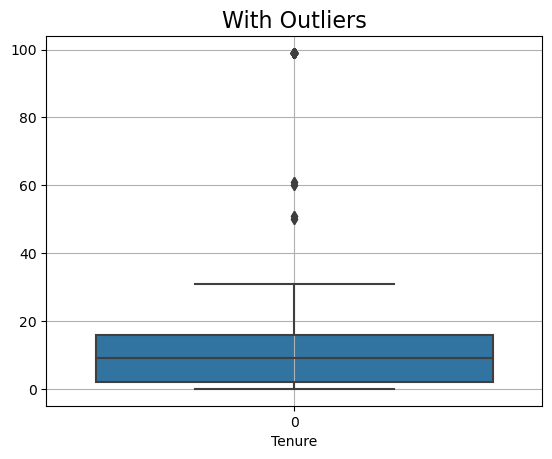

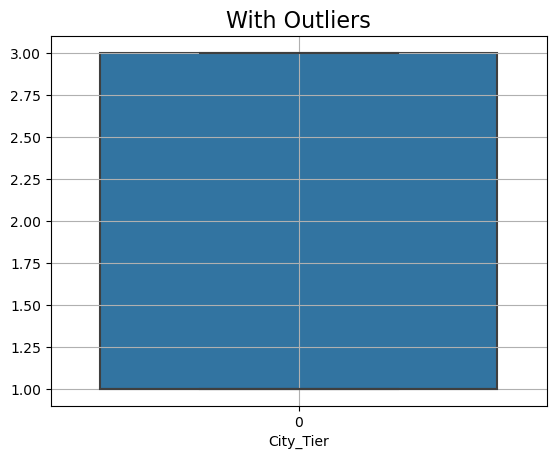

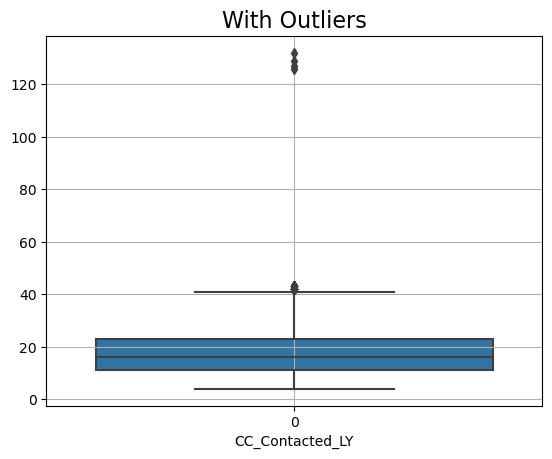

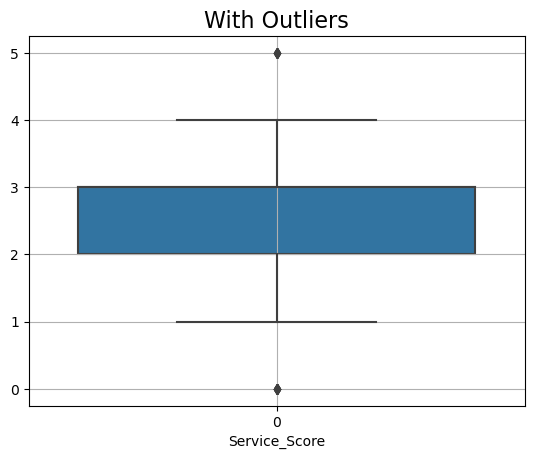

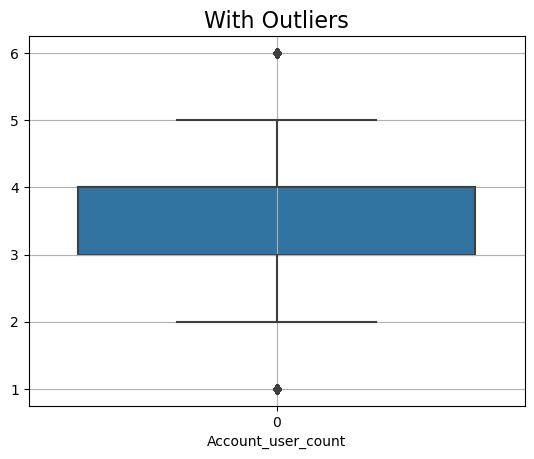

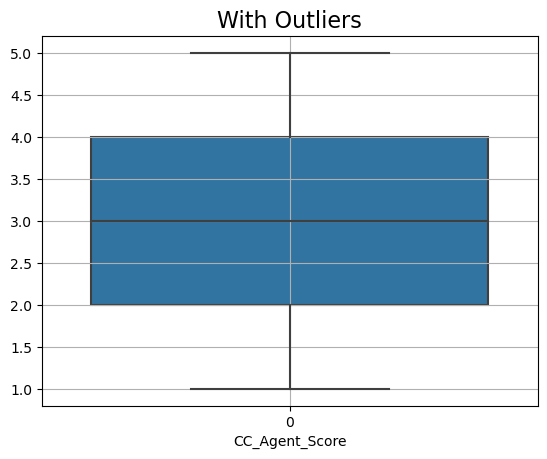

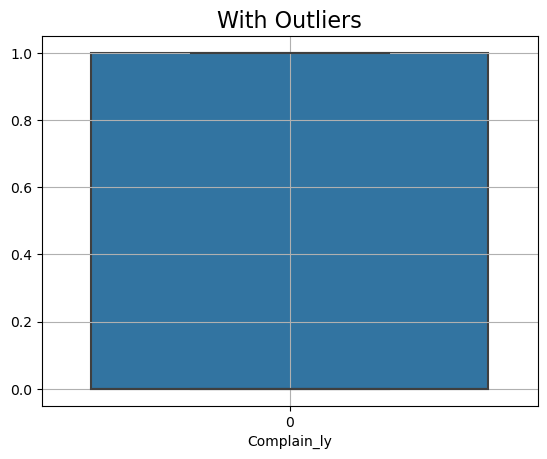

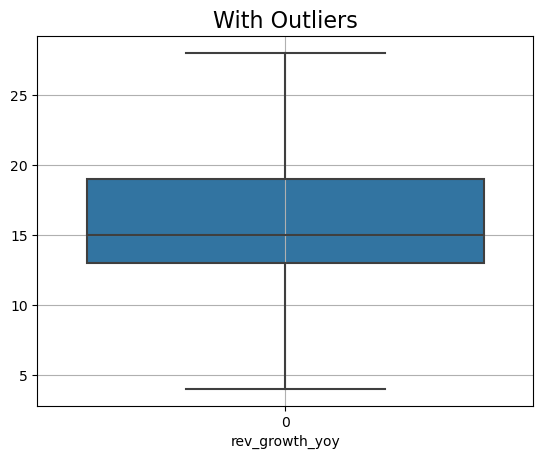

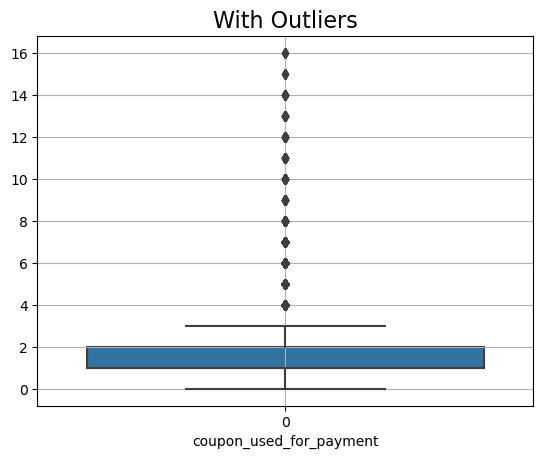

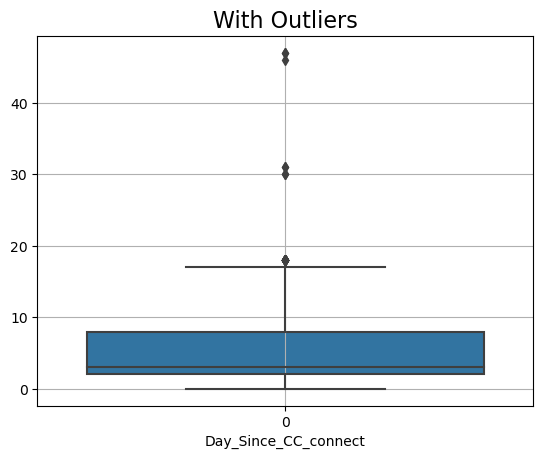

In [62]:
for i in col.columns:
    sns.boxplot(col[i],whis=1.5,orient='V')
    plt.title('With Outliers',fontsize=16)
    plt.xlabel(i)
    plt.grid()
    plt.show();

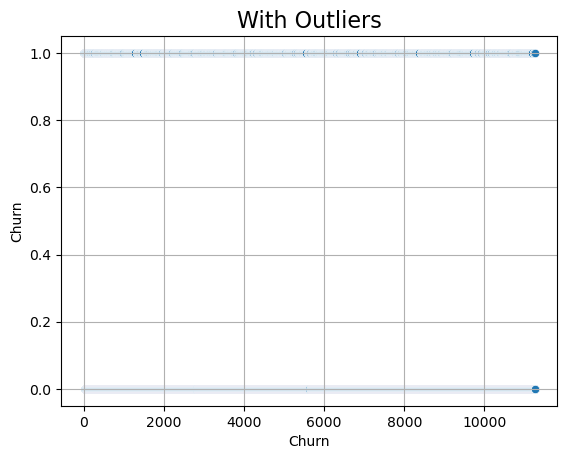

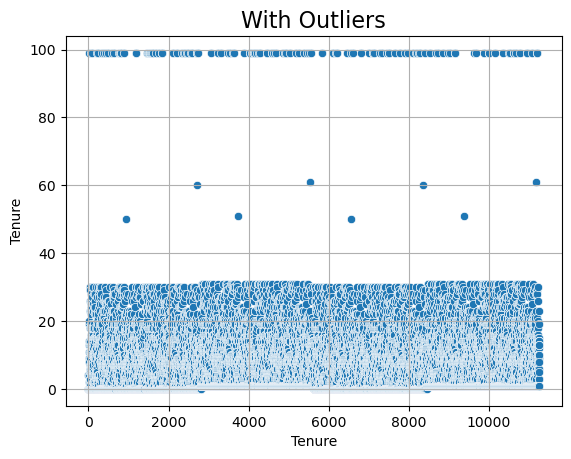

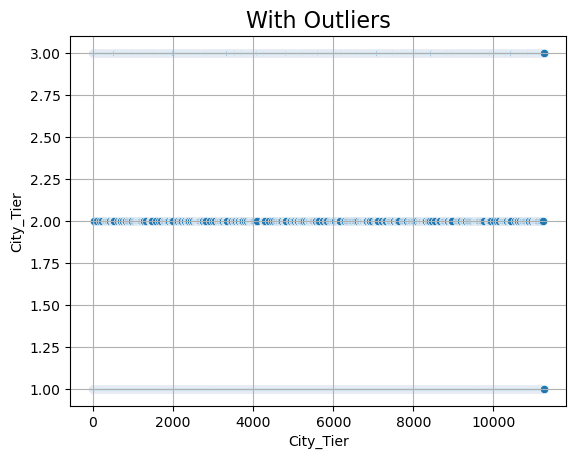

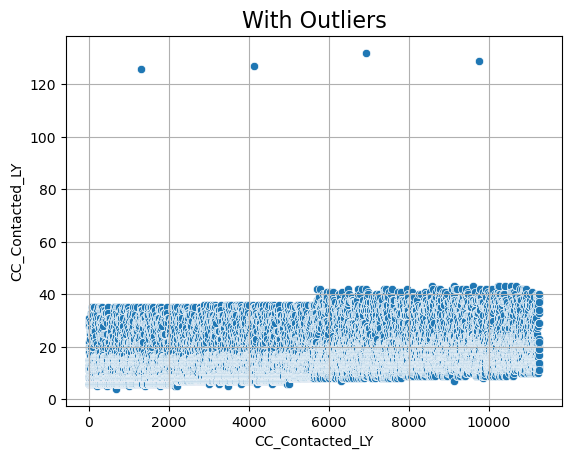

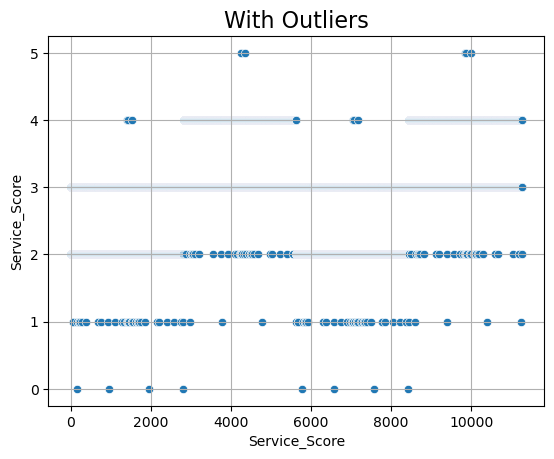

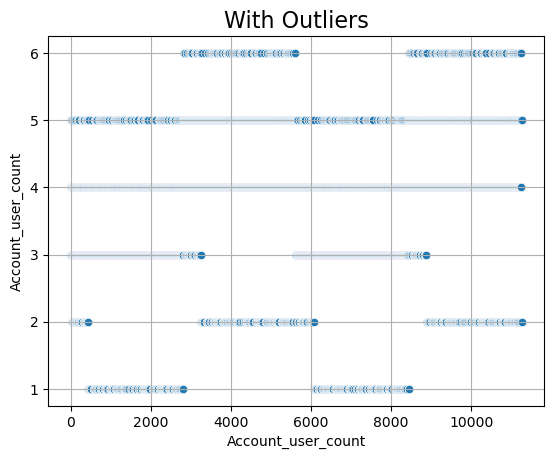

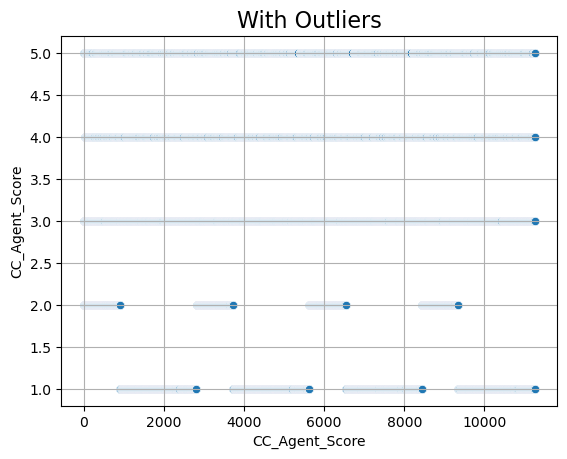

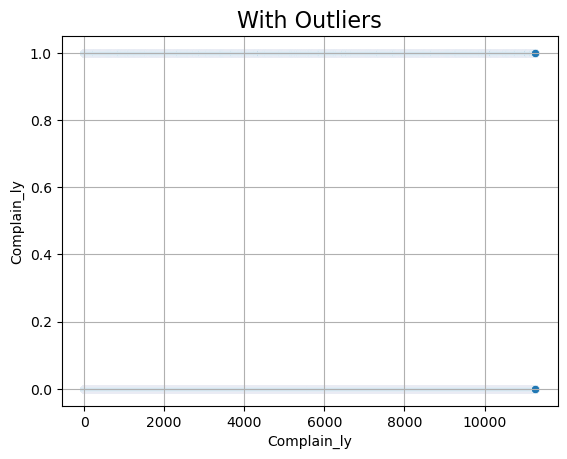

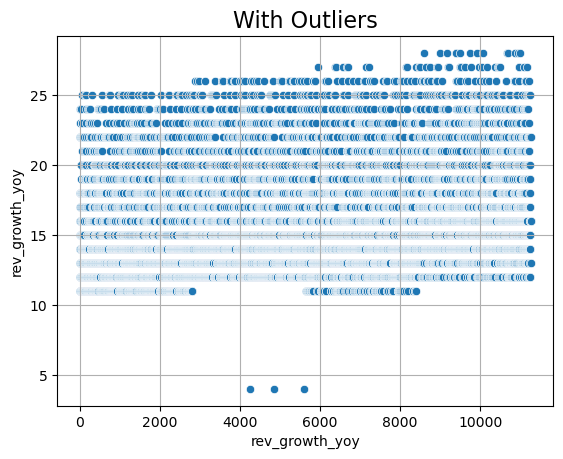

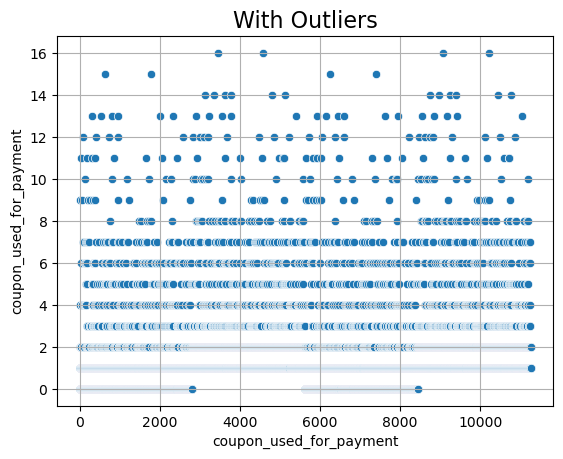

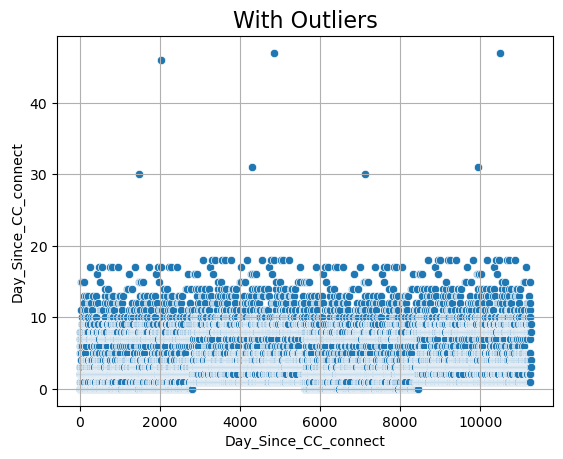

In [58]:
#scatter plot

for i in col.columns:
    sns.scatterplot(col[i])
    plt.title('With Outliers',fontsize=16)
    plt.xlabel(i)
    plt.grid()
    plt.show();

In [56]:
#getting only the numeric columns, it will be in data frame

col=df.select_dtypes(exclude='object')

In [57]:
col.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect'],
      dtype='object')

In [66]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Service_Score            11162 non-null  float64
 5   Account_user_count       10816 non-null  float64
 6   CC_Agent_Score           11144 non-null  float64
 7   Complain_ly              10903 non-null  float64
 8   rev_growth_yoy           11257 non-null  float64
 9   coupon_used_for_payment  11257 non-null  float64
 10  Day_Since_CC_connect     10902 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 967.8 KB


In [59]:
c=['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback']

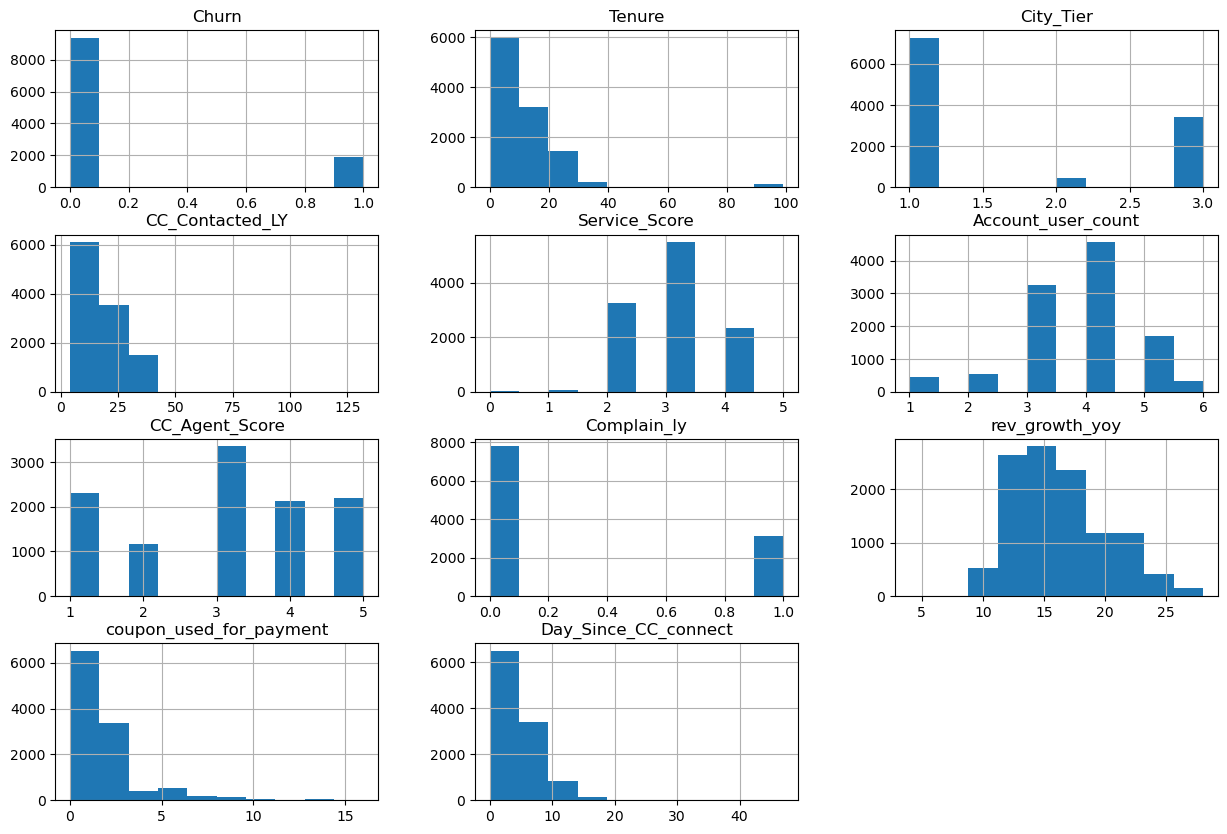

In [60]:
fig = plt.figure(figsize = (15,10)) #figure size
ax = fig.gca() #this function adds as many as subplots as required depending upon number of columns
col.hist(ax=ax) #histogram for numerical columns where axis ax is passed 
plt.show()

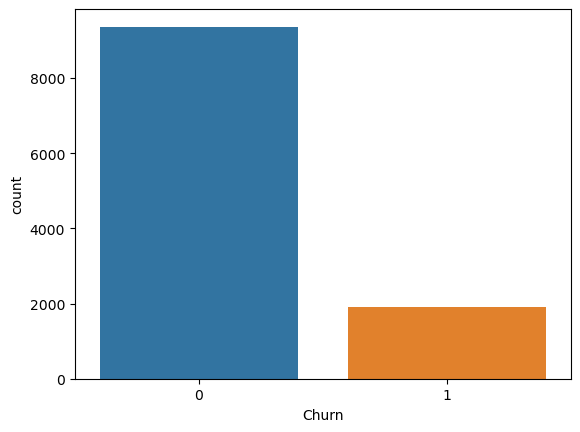

In [61]:
sns.countplot(x=df['Churn'])
plt.show()

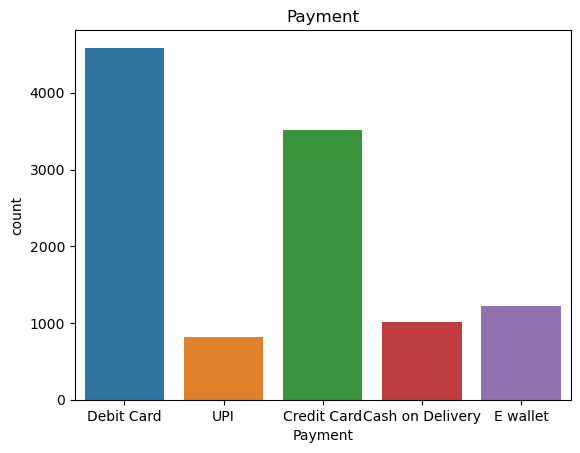

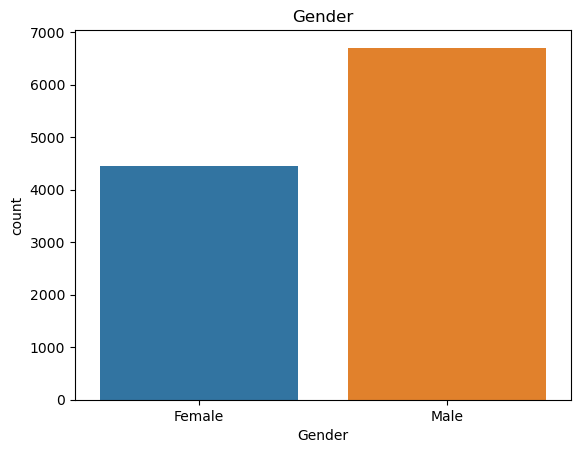

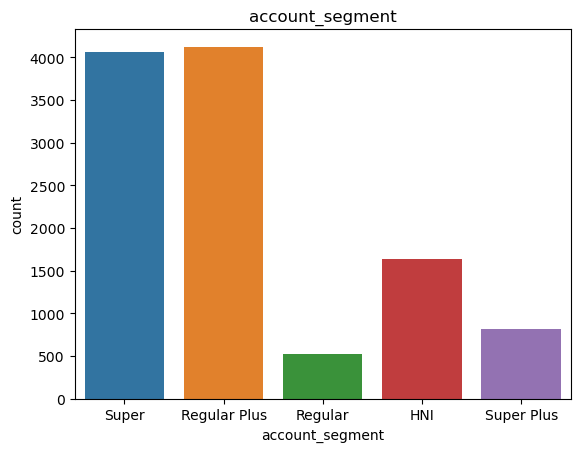

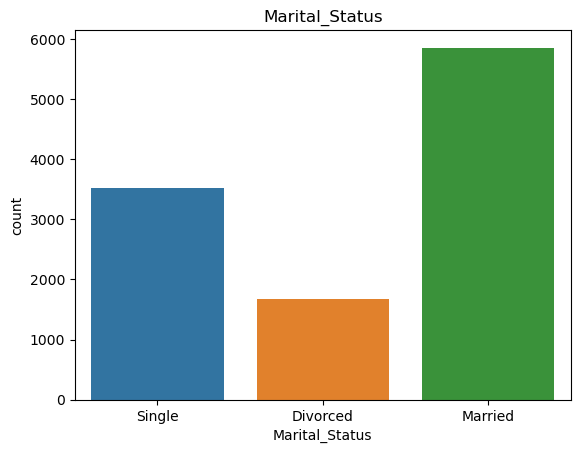

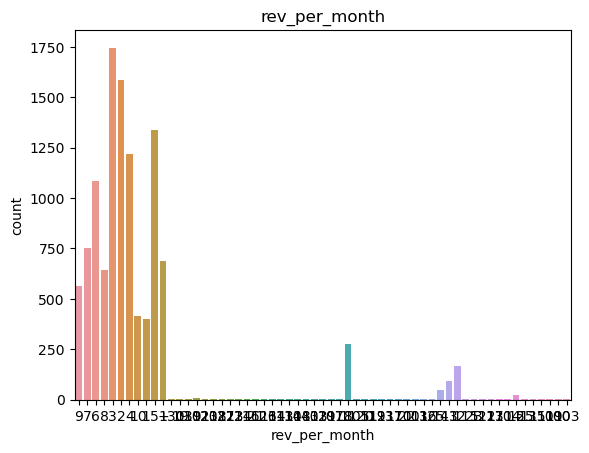

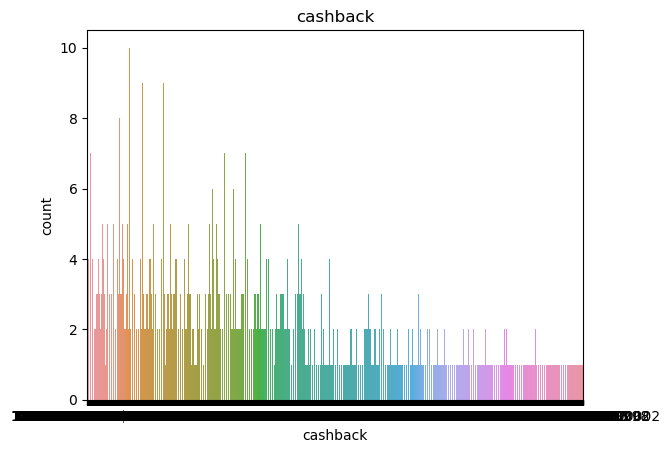

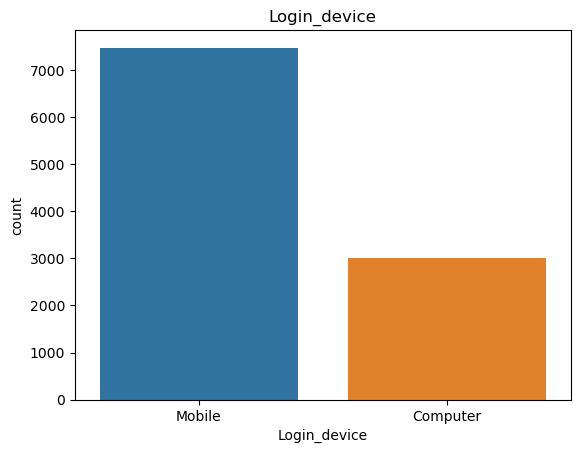

In [62]:
# Create a list of the categorical columns
categorical_columns = [column for column in df.columns if df[column].dtype == "object"]

# Create a for loop to create a countplot for each categorical column
for column in categorical_columns:
    plt.title(column)
    sns.countplot(x=column, data=df)
    plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

### b) Bivariate analysis (relationship between different variables , correlations)

In [64]:
#revenu per month by gender

sns.barplot(x=df['Gender'],y=df['rev_per_month'],ci=False)
plt.title('Gender vs. Revenue')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
#churn vs service_score

sns.barplot(x=df['Churn'],y=df['Service_Score'],ci=False)
plt.title('Churn vs. Service score')
plt.show()

In [ ]:
#churn vs service_score

sns.boxplot(x=df['Churn'],y=df['Service_Score'])
plt.title('Churn vs. Service score')
plt.show()

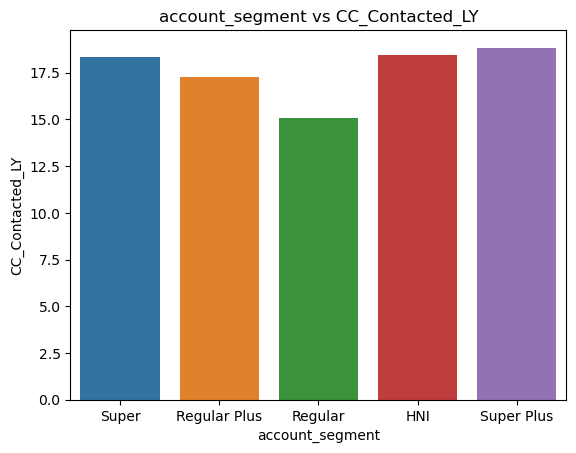

In [65]:
#account_segment vs CC_Contacted_LY

sns.barplot(x=df['account_segment'],y=df['CC_Contacted_LY'],ci=False)
plt.title('account_segment vs CC_Contacted_LY')
plt.show()

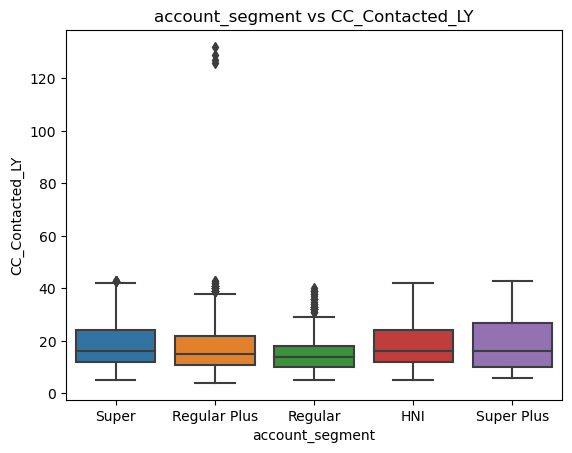

In [66]:
#account_segment vs CC_Contacted_LY

sns.boxplot(x=df['account_segment'],y=df['CC_Contacted_LY'])
plt.title('account_segment vs CC_Contacted_LY')
plt.show()

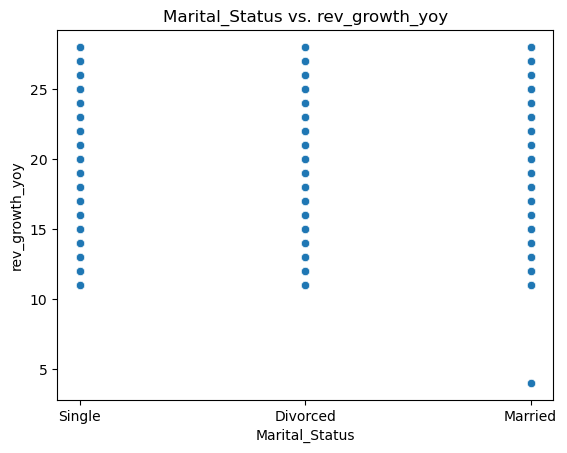

In [67]:
#Marital_Status by rev_growth_yoy : Scatter plot

sns.scatterplot(x=df['Marital_Status'],y=df['rev_growth_yoy'])
plt.title('Marital_Status vs. rev_growth_yoy')
plt.show()

In [68]:
#cashback vs Marital_Status

sns.barplot(x=df['Marital_Status'],y=df['cashback'],ci=False)
plt.title('cashback vs Marital_Status')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

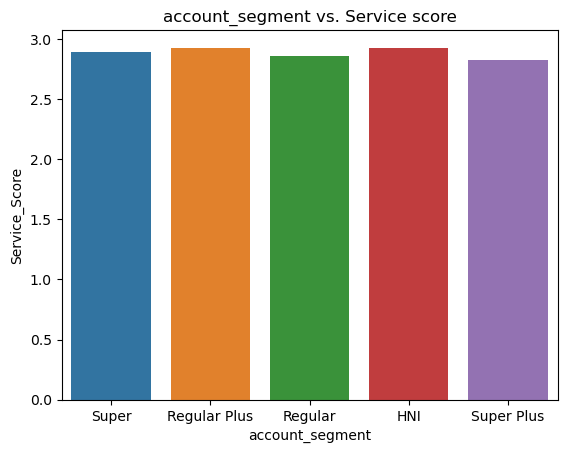

In [69]:
#account_segment vs service_score

sns.barplot(x=df['account_segment'],y=df['Service_Score'],ci=False)
plt.title('account_segment vs. Service score')
plt.show()

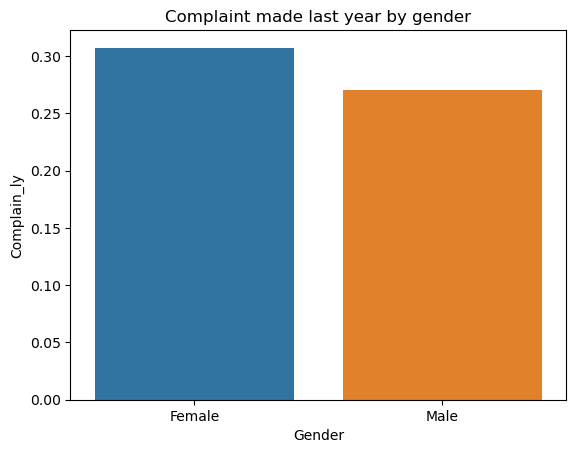

In [70]:
#complaints by gender x= Gender, y= Complain_ly


sns.barplot(x=df['Gender'],y=df['Complain_ly'],ci=False)
plt.title('Complaint made last year by gender')
plt.show()

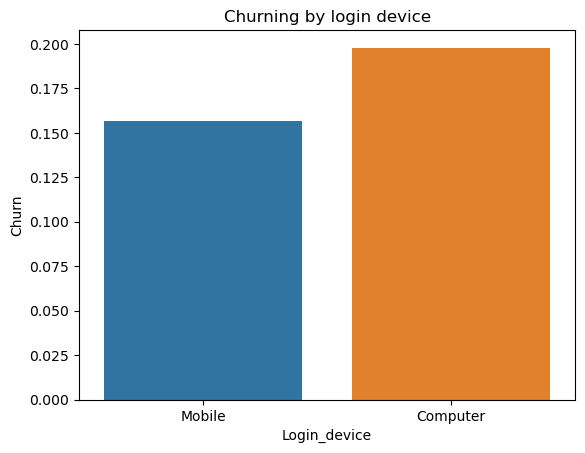

In [71]:
#Chrun by login device y= Churn , x= Login_device



sns.barplot(x=df['Login_device'],y=df['Churn'],ci=False)
plt.title('Churning by login device')
plt.show()

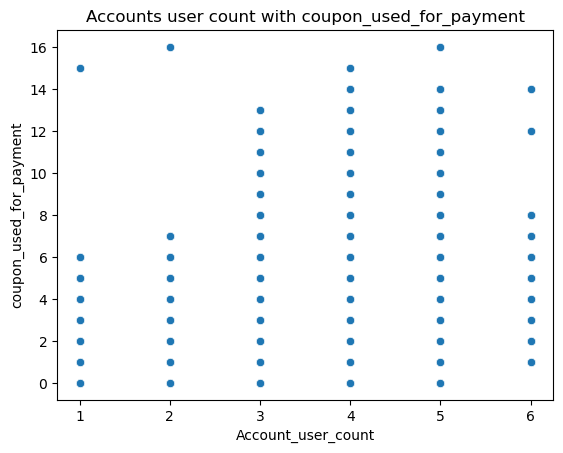

In [72]:
# Account_user_count with coupon used (coupon_used_for_payment)

sns.scatterplot(x=df['Account_user_count'],y=df['coupon_used_for_payment'])
plt.title('Accounts user count with coupon_used_for_payment')
plt.show()

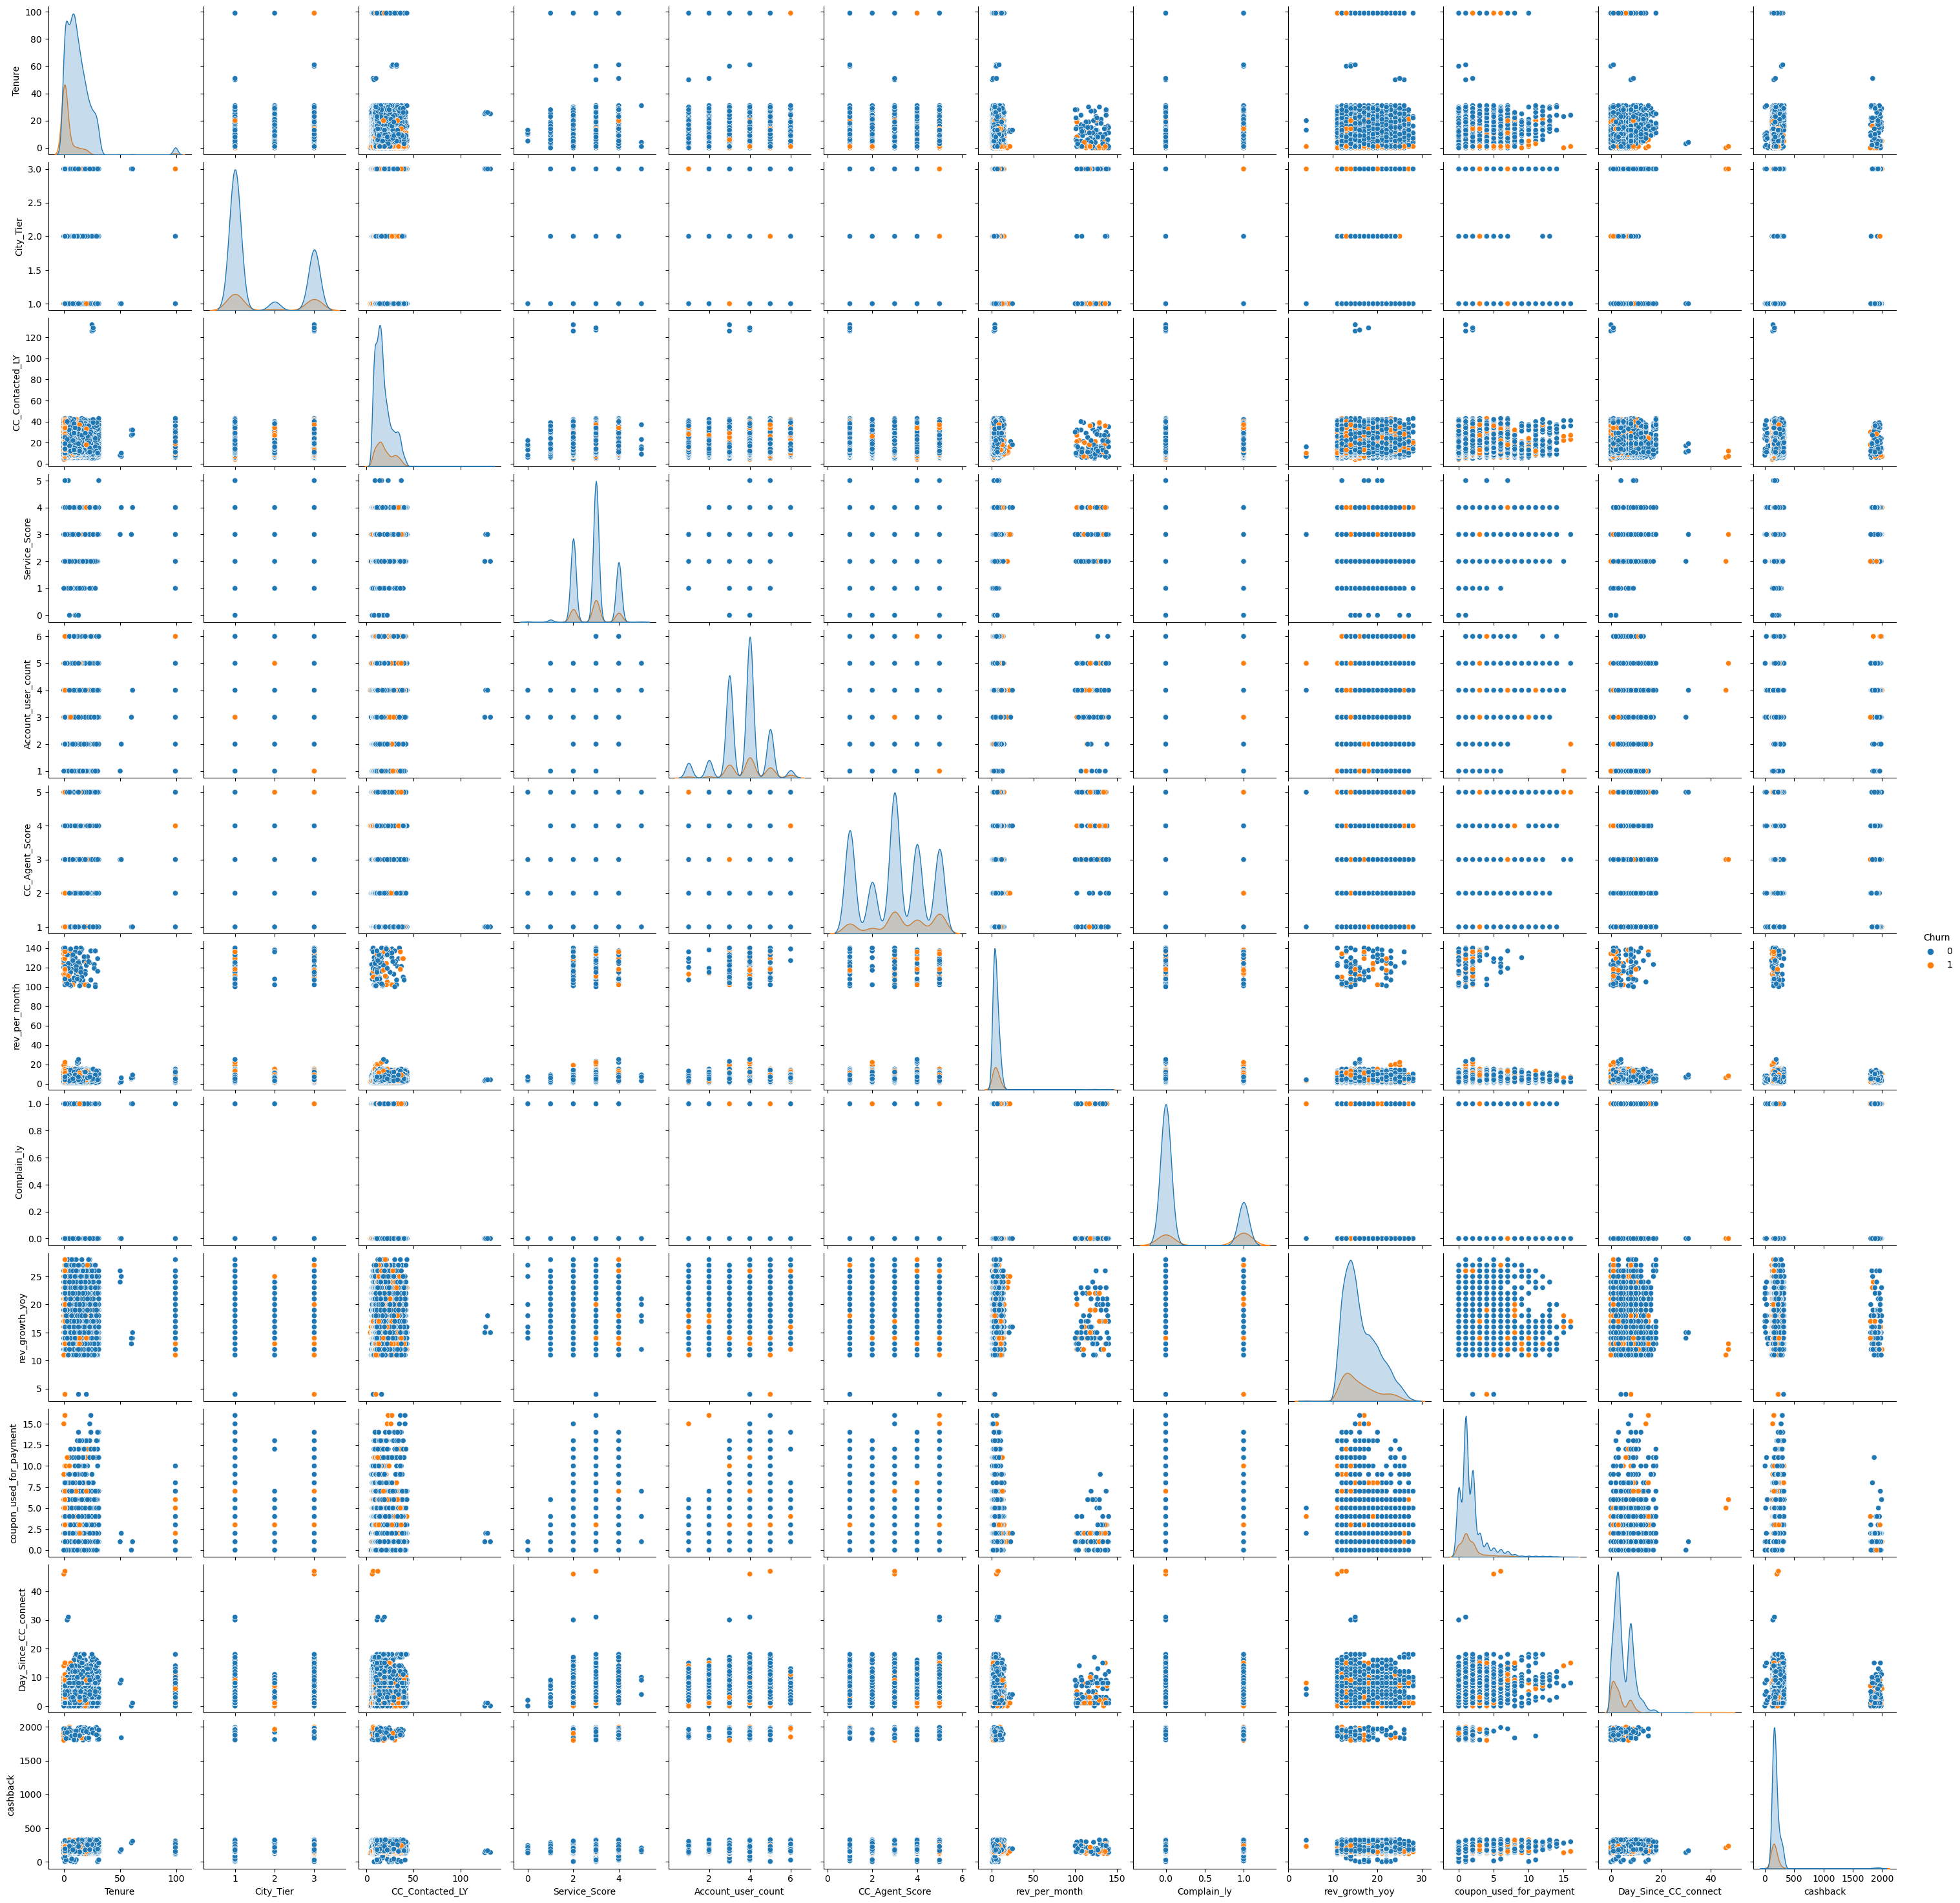

In [274]:
sns.pairplot(data=df,hue='Churn',diag_kind='kde')
plt.show()

In [73]:
# Create a DataFrame of the categorical columns
categorical_columns_df = pd.DataFrame(categorical_columns, columns=['Column'])



In [74]:
categorical_columns_df

Column
0          Payment
1           Gender
2  account_segment
3   Marital_Status
4    rev_per_month
5         cashback
6     Login_device

In [75]:
# Create a pairplot
sns.pairplot(df, vars=categorical_columns_df, hue=df['Churn'], diag_kind='kde')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Multi-variate

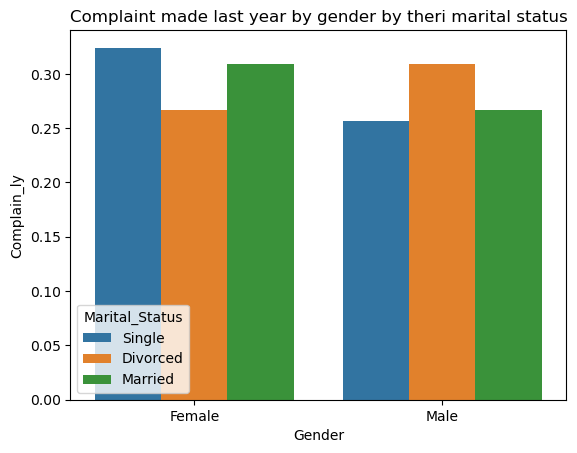

In [76]:
#complaints by gender x= Gender, y= Complain_ly, hue=Churn


sns.barplot(x=df['Gender'],y=df['Complain_ly'],hue=df['Marital_Status'],ci=False)
plt.title('Complaint made last year by gender by theri marital status')
plt.show()

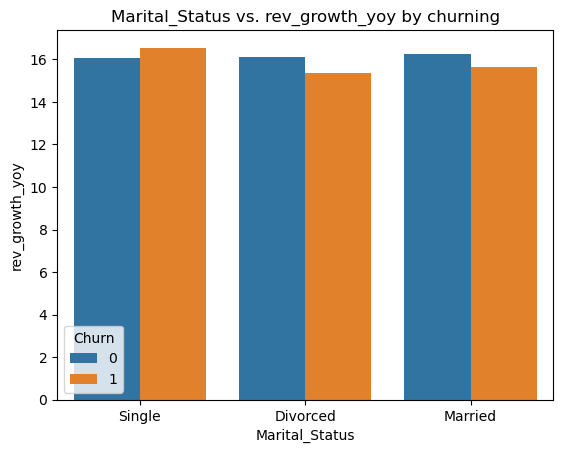

In [77]:
#Marital_Status by rev_growth_yoy

sns.barplot(x=df['Marital_Status'],y=df['rev_growth_yoy'],hue=df['Churn'],ci=False)
plt.title('Marital_Status vs. rev_growth_yoy by churning')
plt.show()

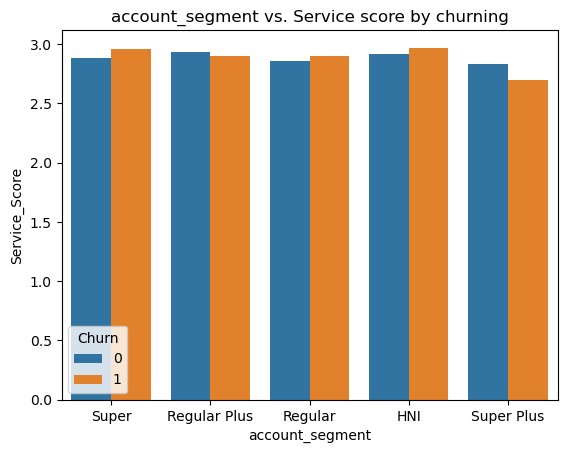

In [78]:
#account_segment vs service_score

sns.barplot(x=df['account_segment'],y=df['Service_Score'],hue=df['Churn'],ci=False)
plt.title('account_segment vs. Service score by churning')
plt.show()

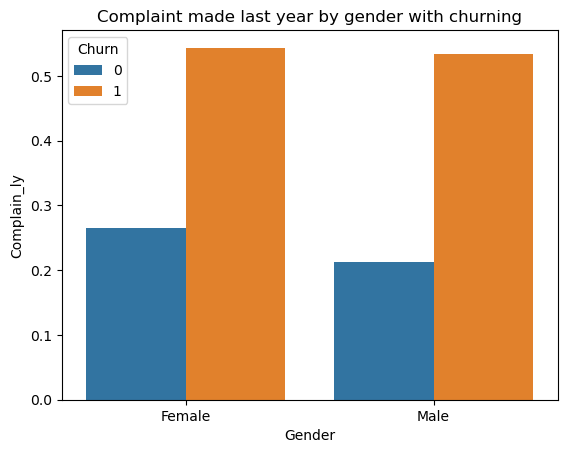

In [79]:
#complaints by gender x= Gender, y= Complain_ly, hue=Churn


sns.barplot(x=df['Gender'],y=df['Complain_ly'],hue=df['Churn'],ci=False)
plt.title('Complaint made last year by gender with churning')
plt.show()

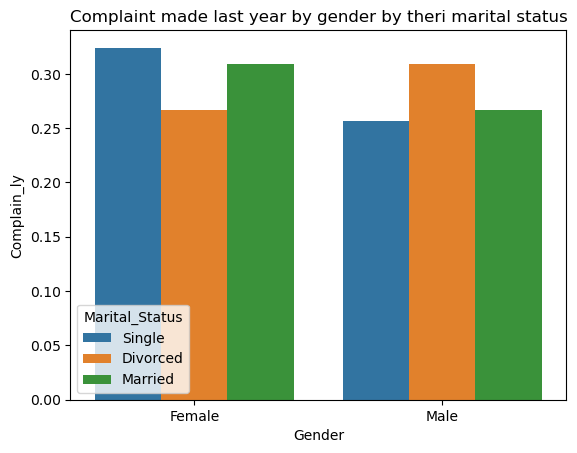

In [80]:
#complaints by gender x= Gender, y= Complain_ly, hue=Churn


sns.barplot(x=df['Gender'],y=df['Complain_ly'],hue=df['Marital_Status'],ci=False)
plt.title('Complaint made last year by gender by theri marital status')
plt.show()

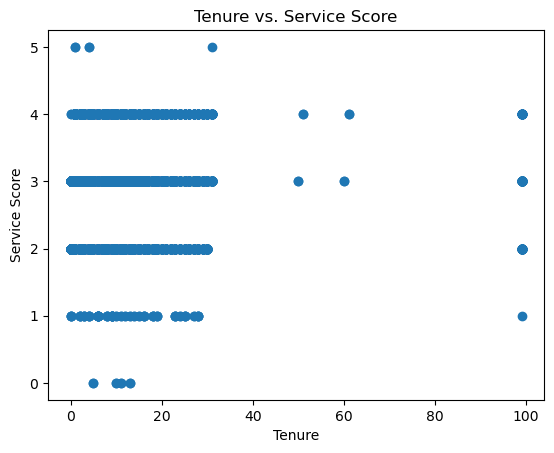

In [94]:
plt.scatter(x=df['Tenure'], y=df['Service_Score'])
plt.title('Tenure vs. Service Score')
plt.xlabel('Tenure')
plt.ylabel('Service Score')
plt.show()

#### Correaltion

In [95]:
df.corr().style.background_gradient(cmap="Blues")

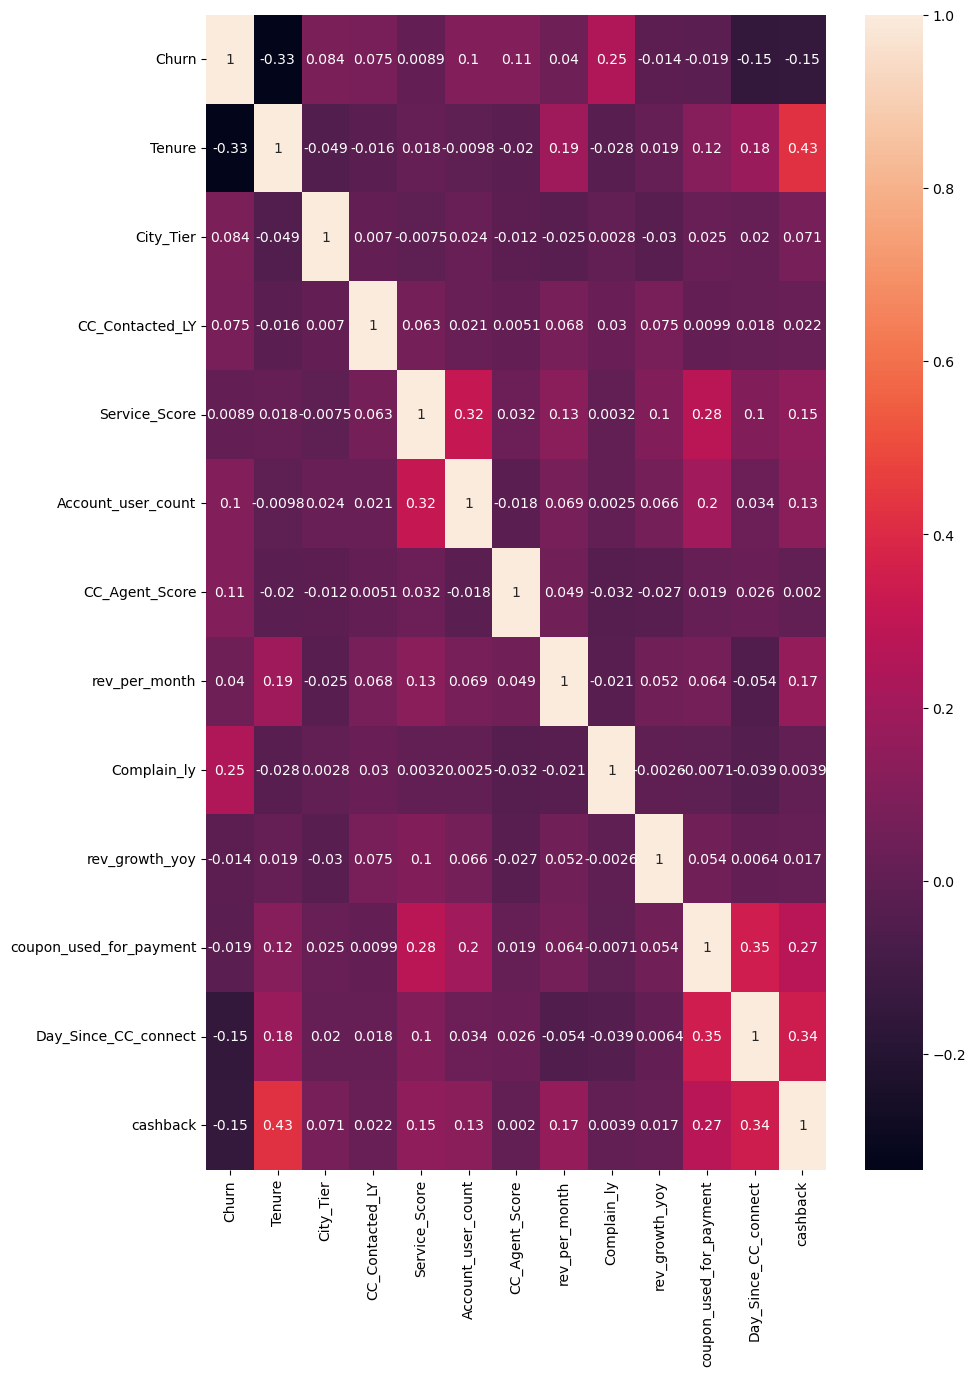

In [144]:
plt.figure(figsize=(10,15))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

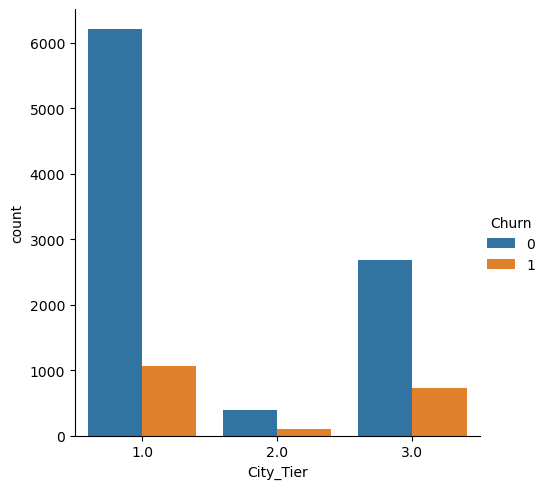

In [81]:
#x=City_Tier , hue= Churn

sns.catplot(data=df,x='City_Tier',hue='Churn',kind='count')
plt.show()

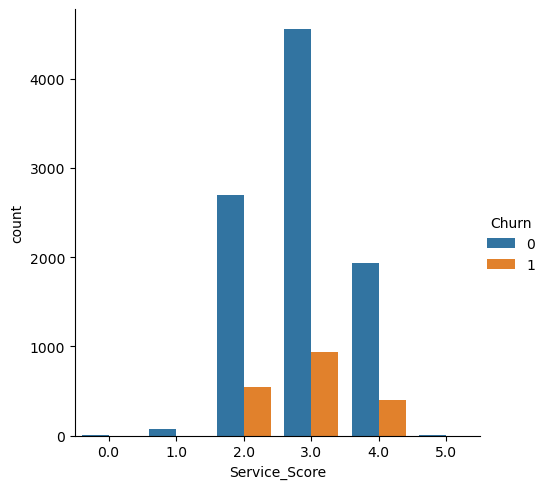

In [98]:
sns.catplot(data=df,x='Service_Score',hue='Churn',kind='count')
plt.show()

#### e) Variable transformation (if applicable)

* Some of the column/feature in this data set has inappropriate data type and it has missing values in it.
* we're agoing to transform categorical variables by label encoding and also will convert variable data type from object to float.
* After, that will perform KNN imputation to impute the missing values in the data.

In [82]:
#Before variable data type conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [83]:
# variable that need to conver to float or int data types

to_num=['rev_per_month','cashback','Complain_ly']

In [84]:
# syntax: dataset['Video Views'] = dataset['Video Views'].astype(int)

df[['rev_per_month','cashback','Complain_ly']]=df[['rev_per_month','cashback','Complain_ly']].apply(pd.to_numeric, errors='coerce')

* By setting errors='coerce', any value that cannot be parsed to numeric will be converted to NaN (Not a Number). This approach allows you to convert the valid numeric values while handling the invalid ones gracefully.

In [85]:
#After converting the column to numeric data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

#### b) Missing Value treatment (if applicable)

In [86]:
#missing values by column

df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [87]:
#Total missing values

df.isnull().sum().sum()

4361

In [88]:
df.size

202680

In [89]:
3670/202680

0.01810736135780541

* In this data set, we have nearly 18% of the data is missing
* we need to treat those missing values, for this we're going to use KNN imputer to impute NAN values for the numeric feature
* And for categorical feature, we will impute with mode

In [90]:
print("Amount of missing values in - ")
for column in df.columns:
    percentage_missing = np.mean(df[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Amount of missing values in - 
Churn : 0%
Tenure : 2%
City_Tier : 1%
CC_Contacted_LY : 1%
Payment : 1%
Gender : 1%
Service_Score : 1%
Account_user_count : 4%
account_segment : 1%
CC_Agent_Score : 1%
Marital_Status : 2%
rev_per_month : 7%
Complain_ly : 3%
rev_growth_yoy : 0%
coupon_used_for_payment : 0%
Day_Since_CC_connect : 3%
cashback : 4%
Login_device : 7%


In [102]:
df.isnull().sum().sort_values(ascending = False)/df.index.size

rev_per_month             0.07
Login_device              0.07
cashback                  0.04
Account_user_count        0.04
Day_Since_CC_connect      0.03
Complain_ly               0.03
Tenure                    0.02
Marital_Status            0.02
CC_Agent_Score            0.01
City_Tier                 0.01
Payment                   0.01
Gender                    0.01
CC_Contacted_LY           0.01
Service_Score             0.01
account_segment           0.01
rev_growth_yoy            0.00
coupon_used_for_payment   0.00
Churn                     0.00
dtype: float64

#### Let's visually inspect the missing values in our data

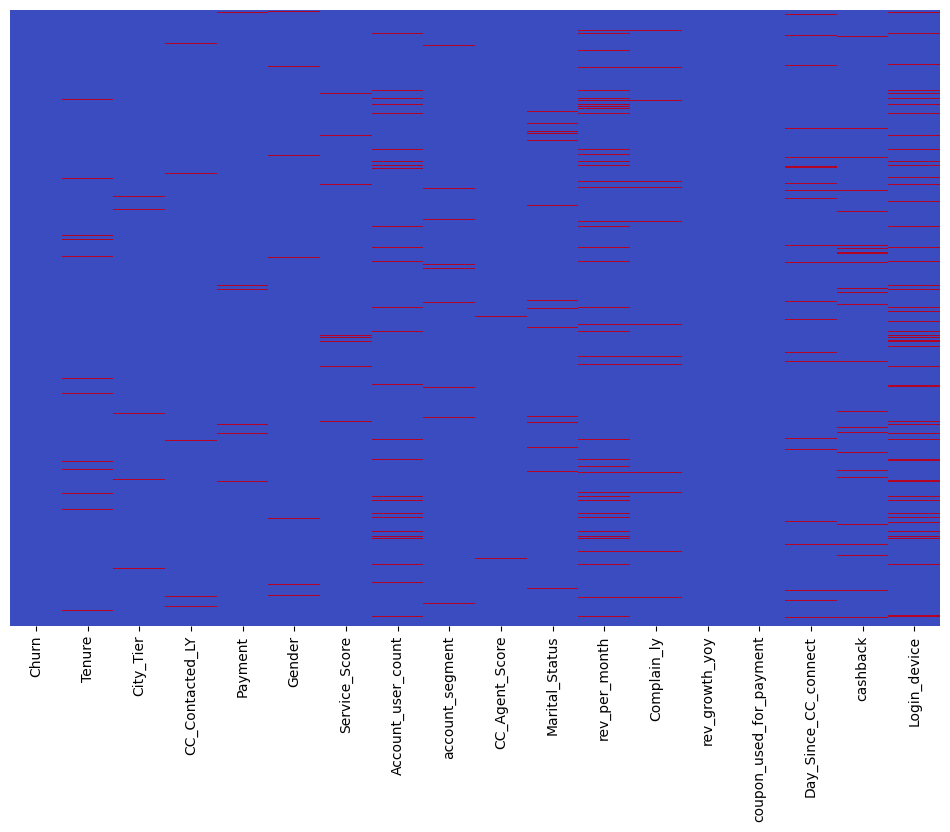

In [91]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [92]:
# Treat missing values for categorical columns

categorical_columns = [column for column in df.columns if df[column].dtype == "object"]
for column in categorical_columns:
    # Impute missing values with the most frequent value
    df[column] = df[column].fillna(df[column].mode()[0])

In [93]:
#After treating catgorical columns with mode

df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         444
account_segment              0
CC_Agent_Score             116
Marital_Status               0
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device                 0
dtype: int64

In [94]:
# Treat missing values for numeric columns

numeric_columns = [column for column in df.columns if df[column].dtype == "float64"]
for column in numeric_columns:
    # Impute missing values with the mean value
    df[column] = df[column].fillna(df[column].median())

In [95]:
#After treating numeric column with median imputation

df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

### 3. d) Outlier treatment (if required)

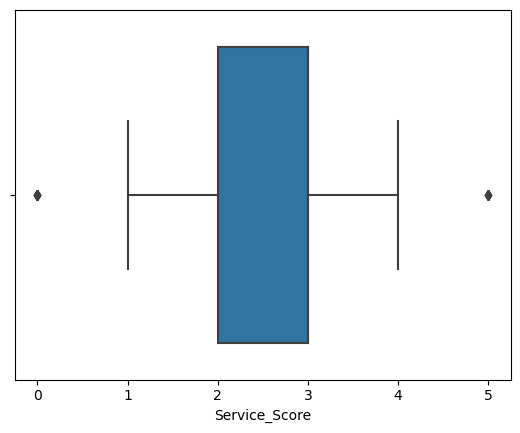

In [96]:
sns.boxplot(x=df['Service_Score'])
#plt.title('account_segment vs CC_Contacted_LY')
plt.show()

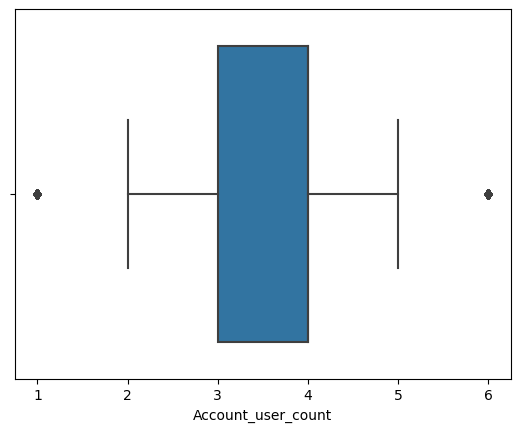

In [97]:
sns.boxplot(x=df['Account_user_count'])
#plt.title('account_segment vs CC_Contacted_LY')
plt.show()

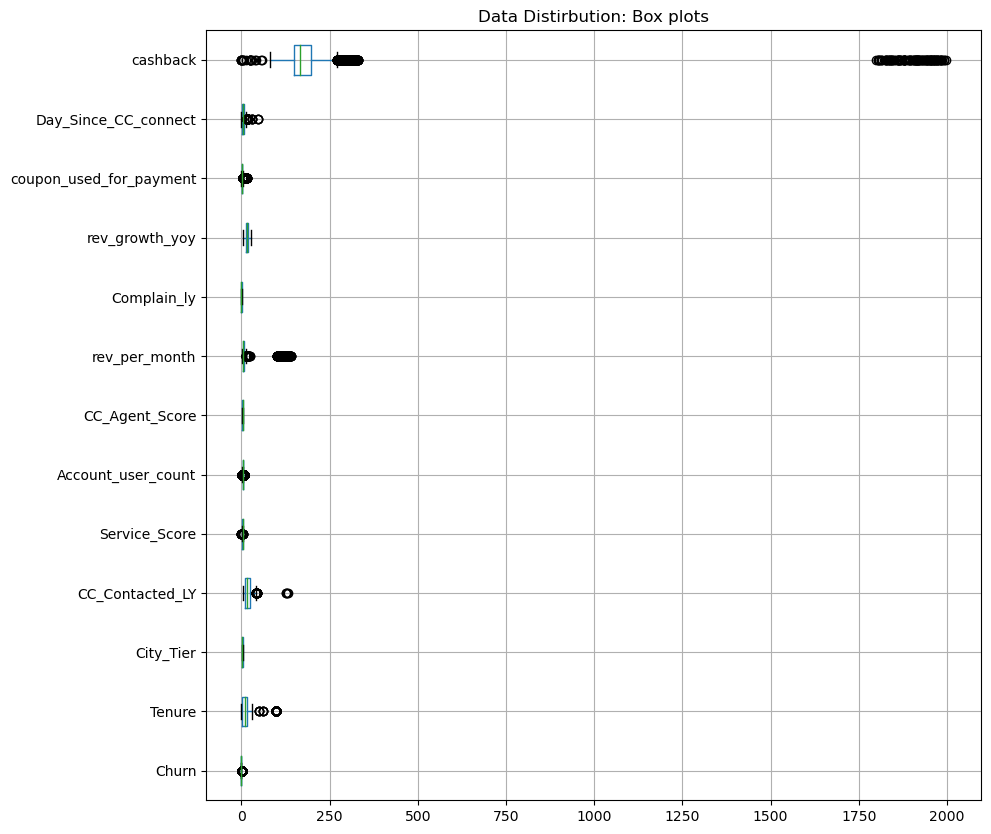

In [98]:
#Outlier check : Before treatment

plt.figure(figsize=(10,10))
plt.title('Data Distirbution: Box plots')
df.boxplot(vert=0)
plt.show()

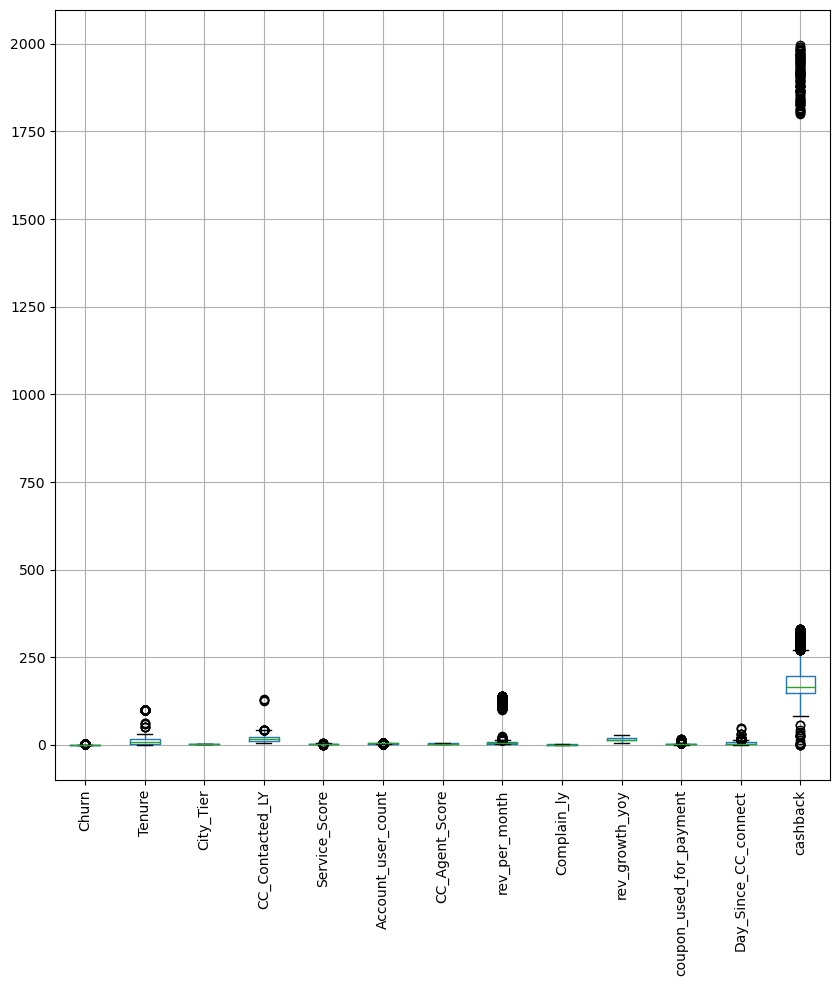

In [99]:
plt.figure(figsize=(10,10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

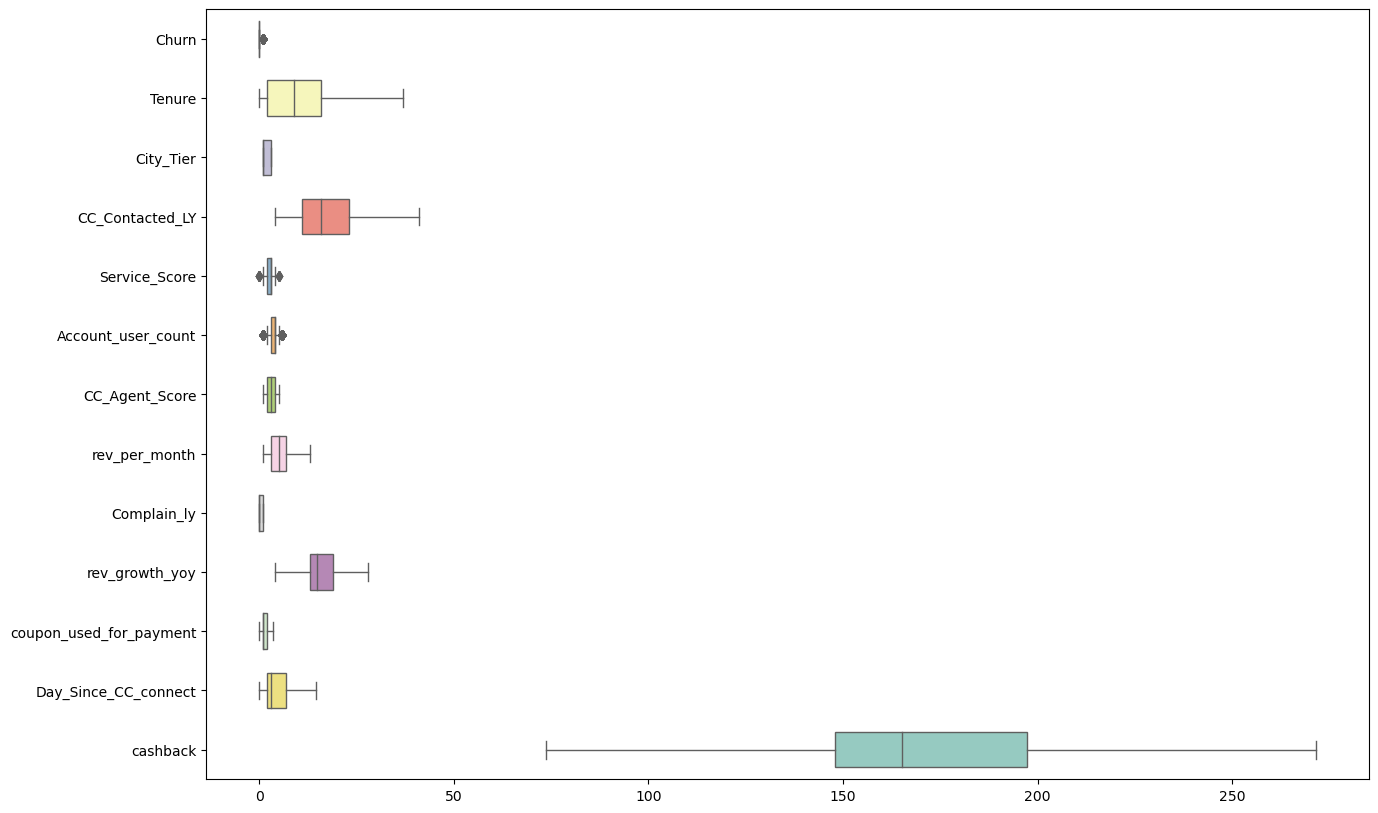

In [119]:
#Outliers check

f, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=1)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [121]:
#checking if the data is balanced or not

df.groupby(["Churn"]).count()

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
Churn                                                                       
0        9364       9364             9364     9364    9364           9364   
1        1896       1896             1896     1896    1896           1896   

       Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
Churn                                                                        
0                    9364             9364            9364            9364   
1                    1896             1896            1896            1896   

       rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
Churn                                                                        
0               9364         9364            9364                     9364   
1               1896         1896            1896                     1896   

       Day_Since_CC_connect  cashback  Login_device  
Churn                                                
0                      9364      9364          9364  
1                      1896      1896          1896

In [117]:
#Outlier treatment

dfc_X = df.drop('Churn', axis = 1)
dfc_Y = df['Churn']

In [118]:
dfc_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  float64
 2   CC_Contacted_LY          11260 non-null  float64
 3   Payment                  11260 non-null  object 
 4   Gender                   11260 non-null  object 
 5   Service_Score            11260 non-null  float64
 6   Account_user_count       11260 non-null  float64
 7   account_segment          11260 non-null  object 
 8   CC_Agent_Score           11260 non-null  float64
 9   Marital_Status           11260 non-null  object 
 10  rev_per_month            11260 non-null  float64
 11  Complain_ly              11260 non-null  float64
 12  rev_growth_yoy           11260 non-null  float64
 13  coupon_used_for_payment  11260 non-null  float64
 14  Day_Since_CC_connect  

In [122]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [123]:
for feature in df[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','Day_Since_CC_connect','cashback']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

In [125]:
#After Treatment

((df > ur) | (df < lr)).sum()

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [ ]:
Tenure,CC_Contacted_LY,Account_user_count,cashback,rev_per_month,Day_Since_CC_connect,coupon_used_for_payment,rev_growth_yoy

In [ ]:
['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','Day_Since_CC_connect','cashback']

In [139]:
for feature in dfc_X[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','Day_Since_CC_connect','cashback']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

In [136]:

#for column in dfc_X.columns:
 #   lr, ur = remove_outlier(dfc_X[column])
  #  dfc_X[column] = np.where(dfc_X[column] > ur, ur, dfc_X[column])
   # dfc_X[column] = np.where(dfc_X[column] < lr, lr, dfc_X[column])

In [137]:
#for column in dfc_X.columns:
 #   lr,ur=remove_outlier(dfc_X[column])
  #  dfc_X[column]=np.where(dfc_X[column]>ur,ur,dfc_X[column])
   # dfc_X[column]=np.where(dfc_X[column]<lr,lr,dfc_X[column])

Account_user_count          761
CC_Agent_Score                0
CC_Contacted_LY               0
City_Tier                     0
Complain_ly                   0
Day_Since_CC_connect        130
Gender                        0
Login_device                  0
Marital_Status                0
Payment                       0
Service_Score                13
Tenure                        0
account_segment               0
cashback                    986
coupon_used_for_payment    1380
rev_growth_yoy                0
rev_per_month               185
dtype: int64

In [127]:
#After Treatment

((dfc_X > ur) | (dfc_X < lr)).sum()

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

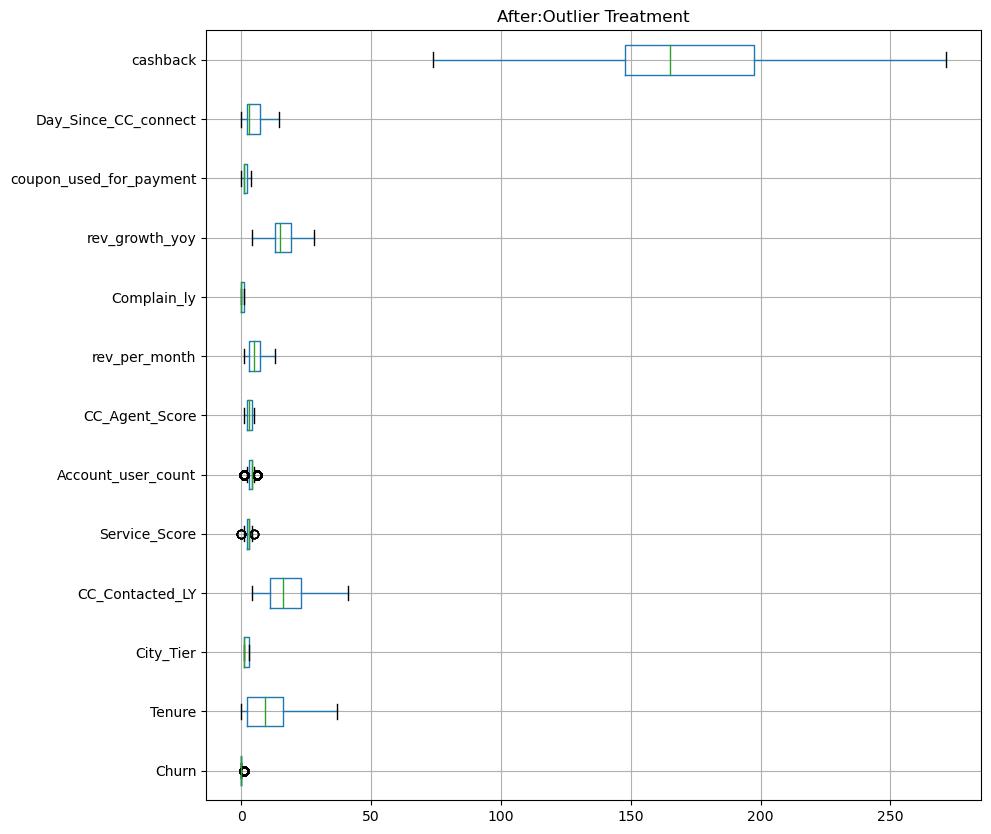

In [128]:
#Outlier check : After treatment

plt.figure(figsize=(10,10))
plt.title('After:Outlier Treatment')
df.boxplot(vert=0)
plt.show()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

## e) Variable transformation (if applicable)

### scaling and encoding the data

In [130]:
churn=df.copy()

In [131]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [132]:
# Calculate the standard deviation of each column in the churn DataFrame
std_dev = churn.std()

# Display the standard deviations
print(std_dev)

Churn                      0.37
Tenure                     8.89
City_Tier                  0.91
CC_Contacted_LY            8.56
Service_Score              0.72
Account_user_count         1.00
CC_Agent_Score             1.37
rev_per_month              2.88
Complain_ly                0.45
rev_growth_yoy             3.76
coupon_used_for_payment    1.10
Day_Since_CC_connect       3.49
cashback                  43.57
dtype: float64


#### Treating variable Payment

In [133]:
churn['Payment'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [134]:
churn['Payment'] = churn['Payment'].replace('Debit Card',1)
churn['Payment'] = churn['Payment'].replace('UPI',2)
churn['Payment'] = churn['Payment'].replace('Credit Card',3)
churn['Payment'] = churn['Payment'].replace('Cash on Delivery',4)
churn['Payment'] = churn['Payment'].replace('E wallet',5)

In [135]:
#After : Label encoding

print('Payment')
churn['Payment'].unique()

Payment


array([1, 2, 3, 4, 5], dtype=int64)

##### Treating variable gender

In [136]:
churn["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [137]:
churn['Gender'] = churn['Gender'].replace('Female',1)
churn['Gender'] = churn['Gender'].replace('Male',2)

In [138]:
#After : Label encoding

print('Gender')
churn['Gender'].unique()

Gender


array([1, 2], dtype=int64)

#### Treating the variable "account_segment"


In [139]:
churn["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus'],
      dtype=object)

In [140]:
churn["account_segment"].value_counts()

Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [141]:
churn['account_segment'] = churn['account_segment'].replace('Regular',1)
churn['account_segment'] = churn['account_segment'].replace('Regular Plus',2)
churn['account_segment'] = churn['account_segment'].replace('Super',3)
churn['account_segment'] = churn['account_segment'].replace('Super Plus',4)
churn['account_segment'] = churn['account_segment'].replace('HNI',5)



In [142]:
#After : Label encoding

print('account_segment')
churn["account_segment"].unique()

account_segment


array([3, 2, 1, 5, 4], dtype=int64)

#### Treating the variable "marital_status"

In [143]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [144]:
churn['Marital_Status'] = churn['Marital_Status'].replace('Single','1')
churn['Marital_Status'] = churn['Marital_Status'].replace('Divorced','2')
churn['Marital_Status'] = churn['Marital_Status'].replace('Married','3')

In [145]:
#After : Label encoding

print('Marital_Status')
churn["Marital_Status"].unique()

Marital_Status


array(['1', '2', '3'], dtype=object)

#### Treating the variable "login_device"

In [146]:
churn['Login_device'].unique()

array(['Mobile', 'Computer'], dtype=object)

In [147]:
churn['Login_device'] = churn['Login_device'].replace('Mobile','1')
churn['Login_device'] = churn['Login_device'].replace('Computer','2')

In [148]:
#After : Label encoding

print('Login_device')
churn["Login_device"].unique()

Login_device


array(['1', '2'], dtype=object)

#### Converting the columns to integer data typt for further model building

In [149]:
churn['Payment'] = churn['Payment'].astype('int64')
churn['Gender'] = churn['Gender'].astype('int64')
churn['Service_Score'] = churn['Service_Score'].astype('int64')
churn['Account_user_count'] = churn['Account_user_count'].astype('int64')
churn['account_segment'] = churn['account_segment'].astype('int64')
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].astype('int64')
churn['rev_per_month'] = churn['rev_per_month'].astype('int64')
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].astype('int64')
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('int64')
churn['cashback'] = churn['cashback'].astype('int64')
churn['Marital_Status'] = churn['Marital_Status'].astype('int64')
churn['Complain_ly'] = churn['Complain_ly'].astype('int64')
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('int64')
churn['Login_device'] = churn['Login_device'].astype('int64')

In [150]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  int64  
 5   Gender                   11260 non-null  int64  
 6   Service_Score            11260 non-null  int64  
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  int64  
 9   CC_Agent_Score           11260 non-null  int64  
 10  Marital_Status           11260 non-null  int64  
 11  rev_per_month            11260 non-null  int64  
 12  Complain_ly              11260 non-null  int64  
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

#### Scale the data using minmax scaler

In [151]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the churn DataFrame
churn_scaled = churn.copy()

# Drop the AccountID column
#churn_scaled = churn_scaled.drop('accountid', axis=1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
churn_scaled = pd.DataFrame(scaler.fit_transform(churn_scaled), columns=churn_scaled.columns)

In [152]:
churn_scaled.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0   1.00    0.11       1.00             0.05     0.00    0.00           0.60   
1   1.00    0.00       0.00             0.11     0.25    1.00           0.60   
2   1.00    0.00       0.00             0.70     0.00    1.00           0.40   
3   1.00    0.00       1.00             0.30     0.00    1.00           0.40   
4   1.00    0.00       0.00             0.22     0.50    1.00           0.40   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                0.40             0.50            0.25            0.00   
1                0.60             0.25            0.50            0.00   
2                0.60             0.25            0.50            0.00   
3                0.60             0.50            1.00            0.00   
4                0.40             0.25            1.00            0.00   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0           0.67         1.00            0.29                     0.33   
1           0.50         1.00            0.46                     0.00   
2           0.42         1.00            0.42                     0.00   
3           0.58         0.00            0.79                     0.00   
4           0.17         0.00            0.29                     0.33   

   Day_Since_CC_connect  cashback  Login_device  
0                  0.36      0.43          0.00  
1                  0.00      0.24          0.00  
2                  0.21      0.46          0.00  
3                  0.21      0.31          0.00  
4                  0.21      0.28          0.00

In [153]:
scaled_std=churn_scaled.std()

print(scaled_std)

Churn                     0.37
Tenure                    0.24
City_Tier                 0.46
CC_Contacted_LY           0.23
Payment                   0.34
Gender                    0.49
Service_Score             0.14
Account_user_count        0.20
account_segment           0.27
CC_Agent_Score            0.34
Marital_Status            0.45
rev_per_month             0.24
Complain_ly               0.45
rev_growth_yoy            0.16
coupon_used_for_payment   0.33
Day_Since_CC_connect      0.25
cashback                  0.22
Login_device              0.44
dtype: float64


### 3. f) Addition of new variables (if required)	

* Currently, there is no need to introduce any new variables. However, as the model development progresses, if necessary, variables can be created accordingly.

### 4) Business insights from EDA 

#### 4. a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

* we can use SMOTE to treat the data imbalance

# PROJECT NOTE - II

### Splitting data into train and test data set

In [154]:
#before data type conversion

churn_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  float64
 5   Gender                   11260 non-null  float64
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  float64
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  float64
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [155]:
#converting the scaled data  from float to int datatypes

churn_scaled['Payment'] = churn_scaled['Payment'].astype('int64')
churn_scaled['Gender'] = churn_scaled['Gender'].astype('int64')
churn_scaled['Service_Score'] = churn_scaled['Service_Score'].astype('int64')
churn_scaled['Account_user_count'] = churn_scaled['Account_user_count'].astype('int64')
churn_scaled['account_segment'] = churn_scaled['account_segment'].astype('int64')
churn_scaled['CC_Agent_Score'] = churn_scaled['CC_Agent_Score'].astype('int64')
churn_scaled['rev_per_month'] = churn_scaled['rev_per_month'].astype('int64')
churn_scaled['coupon_used_for_payment'] = churn_scaled['coupon_used_for_payment'].astype('int64')
churn_scaled['Day_Since_CC_connect'] = churn_scaled['Day_Since_CC_connect'].astype('int64')
churn_scaled['cashback'] = churn_scaled['cashback'].astype('int64')
churn_scaled['Marital_Status'] = churn_scaled['Marital_Status'].astype('int64')
churn_scaled['Complain_ly'] = churn_scaled['Complain_ly'].astype('int64')
churn_scaled['rev_growth_yoy'] = churn_scaled['rev_growth_yoy'].astype('int64')
churn_scaled['Login_device'] = churn_scaled['Login_device'].astype('int64')
#churn_scaled['Churn'] = churn_scaled['Churn'].astype('int64')
churn_scaled['Tenure'] = churn_scaled['Tenure'].astype('int64')
churn_scaled['City_Tier'] = churn_scaled['City_Tier'].astype('int64')
churn_scaled['CC_Contacted_LY'] = churn_scaled['CC_Contacted_LY'].astype('int64')

In [156]:
#After conversion of float to int data types

churn_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  float64
 1   Tenure                   11260 non-null  int64  
 2   City_Tier                11260 non-null  int64  
 3   CC_Contacted_LY          11260 non-null  int64  
 4   Payment                  11260 non-null  int64  
 5   Gender                   11260 non-null  int64  
 6   Service_Score            11260 non-null  int64  
 7   Account_user_count       11260 non-null  int64  
 8   account_segment          11260 non-null  int64  
 9   CC_Agent_Score           11260 non-null  int64  
 10  Marital_Status           11260 non-null  int64  
 11  rev_per_month            11260 non-null  int64  
 12  Complain_ly              11260 non-null  int64  
 13  rev_growth_yoy           11260 non-null  int64  
 14  coupon_used_for_paymen

In [157]:
# splitting data into independent and dependent variables
X = churn_scaled.drop('Churn' , axis=1)

y = churn_scaled.pop("Churn")

In [158]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [159]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7882, 17)
X_test (3378, 17)
y_train (7882,)
y_test (3378,)


#### SMOTE

In [160]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [161]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

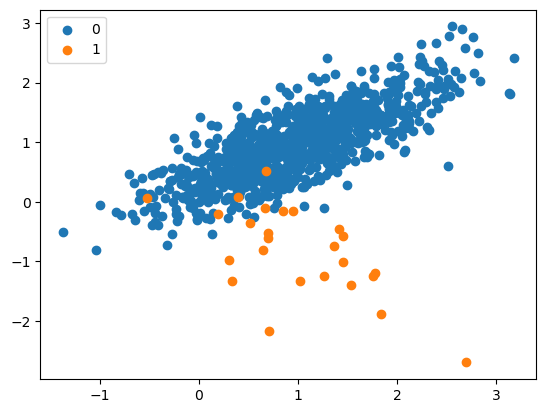

In [162]:
from collections import Counter
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## Performing SMOTE to balance data

In [163]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [164]:
# applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [165]:
#checking the dimentsions of training and test data
print('X_train_res',X_train_res.shape)
#print('X_test',X_test.shape)
print('y_train_res',y_train_res.shape)
#print('y_test',y_test.shape)

X_train_res (13112, 17)
y_train_res (13112,)


In [166]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [167]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

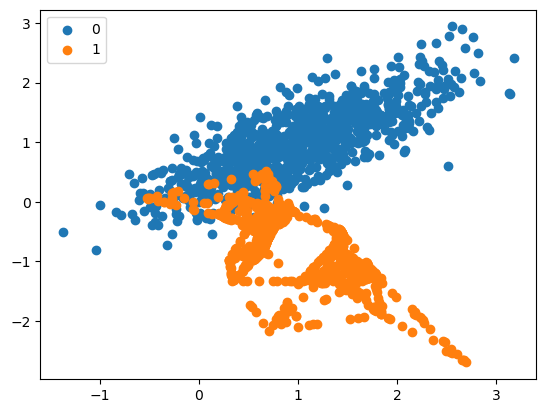

In [168]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#### 4. b) Any business insights using clustering  (if applicable)

In [169]:
from sklearn.cluster import KMeans

In [170]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(churn_scaled)
    wss.append(KM.inertia_)

In [171]:
wss

[19876.13126110119,
 17066.81571692258,
 15314.532813111282,
 14350.392893100849,
 13429.595080331623,
 13023.634988583013,
 12088.967445419474,
 11729.411096657694,
 11365.762121435466,
 10928.776972626592]

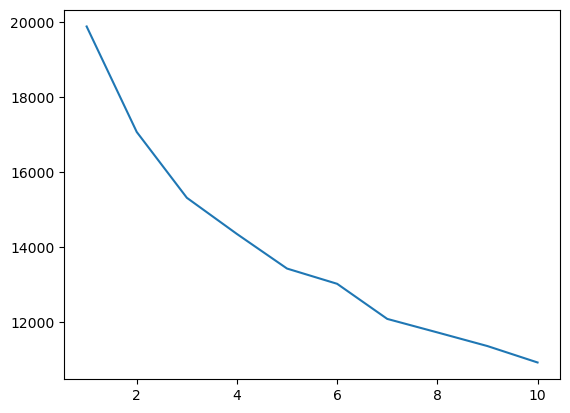

In [172]:
plt.plot(range(1,11), wss)

In [193]:
k_means = KMeans(n_clusters = 3)
k_means.fit(churn_scaled)
labels = k_means.labels_

In [194]:
churn_scaled["Clus_kmeans"] = labels
churn_scaled.head(5)

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0    0.11       1.00             0.05     0.00    0.00           0.60   
1    0.00       0.00             0.11     0.25    1.00           0.60   
2    0.00       0.00             0.70     0.00    1.00           0.40   
3    0.00       1.00             0.30     0.00    1.00           0.40   
4    0.00       0.00             0.22     0.50    1.00           0.40   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                0.40             0.50            0.25            0.00   
1                0.60             0.25            0.50            0.00   
2                0.60             0.25            0.50            0.00   
3                0.60             0.50            1.00            0.00   
4                0.40             0.25            1.00            0.00   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0           0.67         1.00            0.29                     0.33   
1           0.50         1.00            0.46                     0.00   
2           0.42         1.00            0.42                     0.00   
3           0.58         0.00            0.79                     0.00   
4           0.17         0.00            0.29                     0.33   

   Day_Since_CC_connect  cashback  Login_device  Clus_kmeans  
0                  0.36      0.43          0.00            0  
1                  0.00      0.24          0.00            2  
2                  0.21      0.46          0.00            2  
3                  0.21      0.31          0.00            0  
4                  0.21      0.28          0.00            2

In [195]:
churn_scaled.groupby(["Clus_kmeans"]).count()

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
Clus_kmeans                                                        
0              3420       3420             3420     3420    3420   
1              3017       3017             3017     3017    3017   
2              4823       4823             4823     4823    4823   

             Service_Score  Account_user_count  account_segment  \
Clus_kmeans                                                       
0                     3420                3420             3420   
1                     3017                3017             3017   
2                     4823                4823             4823   

             CC_Agent_Score  Marital_Status  rev_per_month  Complain_ly  \
Clus_kmeans                                                               
0                      3420            3420           3420         3420   
1                      3017            3017           3017         3017   
2                      4823            4823           4823         4823   

             rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
Clus_kmeans                                                                  
0                      3420                     3420                  3420   
1                      3017                     3017                  3017   
2                      4823                     4823                  4823   

             cashback  Login_device  
Clus_kmeans                          
0                3420          3420  
1                3017          3017  
2                4823          4823

# PROJECT NOTE - II

In [173]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 7580 to 235
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   7882 non-null   int64
 1   City_Tier                7882 non-null   int64
 2   CC_Contacted_LY          7882 non-null   int64
 3   Payment                  7882 non-null   int64
 4   Gender                   7882 non-null   int64
 5   Service_Score            7882 non-null   int64
 6   Account_user_count       7882 non-null   int64
 7   account_segment          7882 non-null   int64
 8   CC_Agent_Score           7882 non-null   int64
 9   Marital_Status           7882 non-null   int64
 10  rev_per_month            7882 non-null   int64
 11  Complain_ly              7882 non-null   int64
 12  rev_growth_yoy           7882 non-null   int64
 13  coupon_used_for_payment  7882 non-null   int64
 14  Day_Since_CC_connect     7882 non-null   int64
 15  ca

In [174]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 784 to 9559
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   3378 non-null   int64
 1   City_Tier                3378 non-null   int64
 2   CC_Contacted_LY          3378 non-null   int64
 3   Payment                  3378 non-null   int64
 4   Gender                   3378 non-null   int64
 5   Service_Score            3378 non-null   int64
 6   Account_user_count       3378 non-null   int64
 7   account_segment          3378 non-null   int64
 8   CC_Agent_Score           3378 non-null   int64
 9   Marital_Status           3378 non-null   int64
 10  rev_per_month            3378 non-null   int64
 11  Complain_ly              3378 non-null   int64
 12  rev_growth_yoy           3378 non-null   int64
 13  coupon_used_for_payment  3378 non-null   int64
 14  Day_Since_CC_connect     3378 non-null   int64
 15  ca

In [175]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13112 entries, 0 to 13111
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   13112 non-null  int64
 1   City_Tier                13112 non-null  int64
 2   CC_Contacted_LY          13112 non-null  int64
 3   Payment                  13112 non-null  int64
 4   Gender                   13112 non-null  int64
 5   Service_Score            13112 non-null  int64
 6   Account_user_count       13112 non-null  int64
 7   account_segment          13112 non-null  int64
 8   CC_Agent_Score           13112 non-null  int64
 9   Marital_Status           13112 non-null  int64
 10  rev_per_month            13112 non-null  int64
 11  Complain_ly              13112 non-null  int64
 12  rev_growth_yoy           13112 non-null  int64
 13  coupon_used_for_payment  13112 non-null  int64
 14  Day_Since_CC_connect     13112 non-null  int64
 15  ca

### Building Logistic Regression Model

In [176]:
# building Logistic regression model
# Fit the model on original data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Fit the Logistic Regression model
lg = LogisticRegression(random_state=1)
lg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [177]:
# predict on train and test data set
ytrain_predict_lg = lg.predict(X_train) # can compare with y_train
ytest_predict_lg = lg.predict(X_test) # can compare with y_test

In [178]:
#Accuracy - Training Data
print("Accuracy of training dataset:",lg.score(X_train, y_train))

Accuracy of training dataset: 0.8425526516112661


In [179]:
# Accuracy - Test Data
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.8422143280047365


Accuracy of training dataset: 0.8425526516112661
    
Accuracy of testing dataset: 0.8422143280047365

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
# confusion matrix for train data set
print("Confusion Matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_lg)

Confusion Matrix for train dataset


array([[6479,   77],
       [1164,  162]], dtype=int64)

In [181]:
# confusion matrix for test data set
print("Confusion Matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lg)

Confusion Matrix for test dataset


array([[2773,   35],
       [ 498,   72]], dtype=int64)

Confusion Matrix for train dataset
array([[6479,   77],
       [1164,  162]], dtype=int64)  Confusion Matrix for test dataset
                                    array([[2773,   35],
                                    [ 498,   72]], dtype=int64)

In [186]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix


In [187]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lg))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      6556
         1.0       0.68      0.12      0.21      1326

    accuracy                           0.84      7882
   macro avg       0.76      0.56      0.56      7882
weighted avg       0.82      0.84      0.79      7882



In [188]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lg))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      2808
         1.0       0.67      0.13      0.21       570

    accuracy                           0.84      3378
   macro avg       0.76      0.56      0.56      3378
weighted avg       0.82      0.84      0.79      3378



AUC score and ROC curve for training dataset
AUC: 0.744


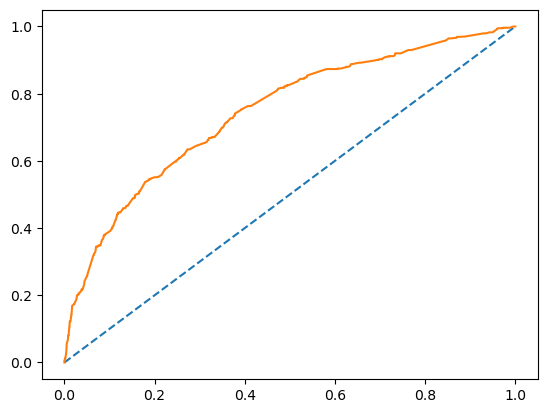

In [190]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.744


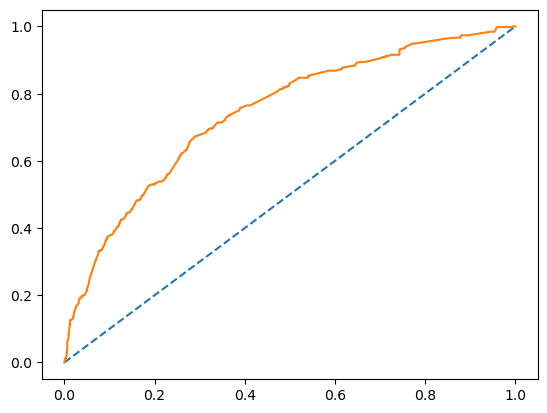

In [191]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [192]:
from sklearn.model_selection import cross_val_score
print("cross validation scroes for traning dataset")
scores_lg_train = cross_val_score(lg, X_train, y_train, cv=10)
scores_lg_train

cross validation scroes for traning dataset


array([0.83776933, 0.84283904, 0.84517766, 0.84390863, 0.84517766,
       0.8464467 , 0.84137056, 0.82994924, 0.83502538, 0.84517766])

In [193]:
print("cross alidation scores for testing dataset")
scores_lg_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lg_test

cross calidation scores for testing dataset


array([0.82248521, 0.83431953, 0.84319527, 0.84023669, 0.84023669,
       0.82544379, 0.83727811, 0.82840237, 0.83382789, 0.83976261])

### HYPERPARAMETER TUNING - Logistic Regression

In [196]:
# loading GridSearchCV and creating dataframe for parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1','l2','none'],
    'tol':[0.0001,0.00001]
}

grid_search_lg = GridSearchCV(estimator = lg, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [197]:
# fitting grid search into traing dataset
grid_search_lg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [198]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

In [199]:
# getting best estimators
best_grid_lg = grid_search.best_estimator_

In [201]:
# predicting training and testing dataset
ytrain_predict_lgcv = best_grid_lg.predict(X_train)
ytest_predict_lgcv = best_grid_lg.predict(X_test)

In [203]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid_lg.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8425526516112661


In [204]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid_lg.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8422143280047365


In [205]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lgcv))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      6556
         1.0       0.68      0.12      0.21      1326

    accuracy                           0.84      7882
   macro avg       0.76      0.56      0.56      7882
weighted avg       0.82      0.84      0.79      7882



In [206]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lgcv))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      2808
         1.0       0.67      0.13      0.21       570

    accuracy                           0.84      3378
   macro avg       0.76      0.56      0.56      3378
weighted avg       0.82      0.84      0.79      3378



In [207]:
# confusion matrix of train dataset
print("confusion matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_lgcv)

confusion matrix for train dataset


array([[6479,   77],
       [1164,  162]], dtype=int64)

In [208]:
# confusion matrix of train dataset
print("confusion matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lgcv)

confusion matrix for test dataset


array([[2773,   35],
       [ 498,   72]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.744


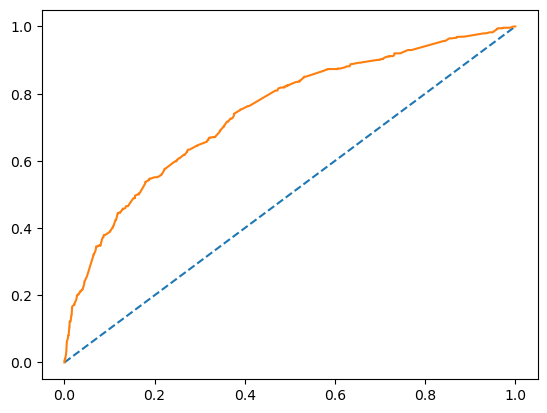

In [211]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = best_grid_lg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.743


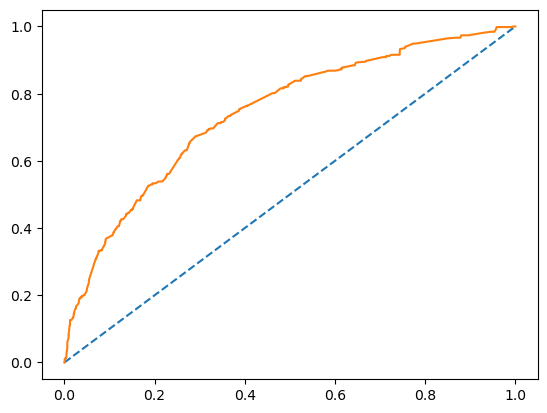

In [212]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = best_grid_lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [214]:
print("cross validation score for training dataset")
scores_lgcv_train = cross_val_score(best_grid_lg, X_train, y_train, cv=10)
scores_lgcv_train

cross validation score for training dataset


array([0.83776933, 0.84283904, 0.84517766, 0.84390863, 0.84517766,
       0.84771574, 0.84137056, 0.82994924, 0.83502538, 0.84517766])

In [215]:
print("cross calidation score for testing dataset")
scores_lgcv_test = cross_val_score(best_grid_lg, X_test, y_test, cv=10)
scores_lgcv_test

cross calidation score for testing dataset


array([0.82248521, 0.83727811, 0.84319527, 0.84023669, 0.84023669,
       0.82544379, 0.83727811, 0.82840237, 0.83382789, 0.83976261])

### Building Logistic regression model using SMOTE

In [216]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [217]:
#fitting model into training dataset
lg.fit(X_train_res, y_train_res)

LogisticRegression(random_state=1)

In [218]:
# predict on train and test data set with balanced dataset
ytrain_predict_lgsm = lg.predict(X_train_res) # can compare with y_train
ytest_predict_lgsm = lg.predict(X_test) # can compare with y_test

In [219]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",lg.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.675183038438072


In [220]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.6838365896980462


In [221]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_lgsm))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68      6556
         1.0       0.68      0.67      0.67      6556

    accuracy                           0.68     13112
   macro avg       0.68      0.68      0.68     13112
weighted avg       0.68      0.68      0.68     13112



In [222]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lgsm))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78      2808
         1.0       0.31      0.69      0.43       570

    accuracy                           0.68      3378
   macro avg       0.61      0.69      0.60      3378
weighted avg       0.81      0.68      0.72      3378



In [223]:
# confusion matrix for train dataset
print("Confusion matrix for train dataset")
confusion_matrix(y_train_res, ytrain_predict_lgsm)

Confusion matrix for train dataset


array([[4484, 2072],
       [2187, 4369]], dtype=int64)

In [224]:
# confusion matrix for test dataset
print("Confusion matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lgsm)

Confusion matrix for test dataset


array([[1914,  894],
       [ 174,  396]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.744


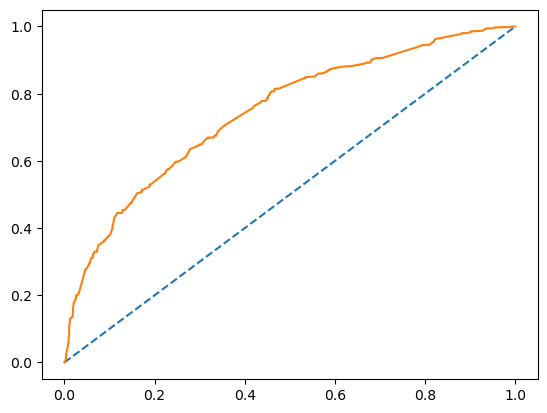

In [226]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.736


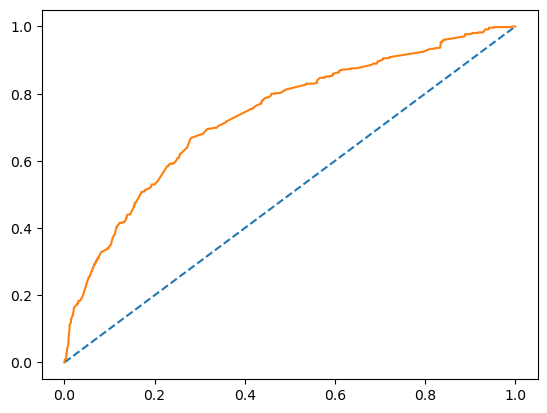

In [227]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [228]:
print("cross validation score for balanced training dataset")
scores_lgsm_train = cross_val_score(lg, X_train_res, y_train_res, cv=10)
scores_lgsm_train

cross validation score for balanced training dataset


array([0.66692073, 0.6570122 , 0.67276888, 0.67048055, 0.66056445,
       0.69870328, 0.65827613, 0.68421053, 0.68726163, 0.68573608])

In [229]:
print("cross validation score for testing dataset")
scores_lgsm_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lgsm_test

cross validation score for testing dataset


array([0.82248521, 0.83431953, 0.84319527, 0.84023669, 0.84023669,
       0.82544379, 0.83727811, 0.82840237, 0.83382789, 0.83976261])

## Building Linear Discriminant Analysis Model (LDA)

In [230]:
#building Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [231]:
# fitting LDA model into training dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda

LinearDiscriminantAnalysis()

In [233]:
# Training Data Class Prediction
ytrain_predict_lda = lda.predict(X_train)

# Test Data Class Prediction
ytest_predict_lda = lda.predict(X_test)

In [234]:
#Accuracy - Training dataset
print("Accuracy score of training dataset:",lda.score(X_train, y_train))

Accuracy score of training dataset: 0.8435676224308551


In [235]:
# Accuracy - Test Data
print("Accuracy score of testing dataset:",lda.score(X_test, y_test))

Accuracy score of testing dataset: 0.8380698638247484


In [236]:
print("Confusion matrix of training dataset")
confusion_matrix(y_train, ytrain_predict_lda)

Confusion matrix of training dataset


array([[6421,  135],
       [1098,  228]], dtype=int64)

In [237]:
print("Confusion matrix of testing dataset")
confusion_matrix(y_test, ytest_predict_lda)

Confusion matrix of testing dataset


array([[2742,   66],
       [ 481,   89]], dtype=int64)

In [238]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix

In [239]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      6556
         1.0       0.63      0.17      0.27      1326

    accuracy                           0.84      7882
   macro avg       0.74      0.58      0.59      7882
weighted avg       0.82      0.84      0.80      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.57      0.16      0.25       570

    accuracy                           0.84      3378
   macro avg       0.71      0.57      0.58      3378
weighted avg       0.80      0.84      0.80      3378
 



AUC score and ROC curve for training dataset
AUC: 0.736


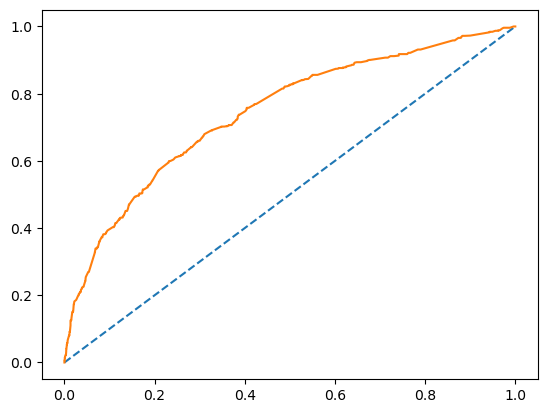

In [240]:
#creating ROC curve and getting AUC score for train data set
#predict probabilities
probs1 = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
train_auc1 = roc_auc_score(y_train, probs1)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr1, train_tpr1, train_thresholds1 = roc_curve(y_train, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr1, train_tpr1);

AUC score and ROC curve for testing dataset
AUC: 0.736


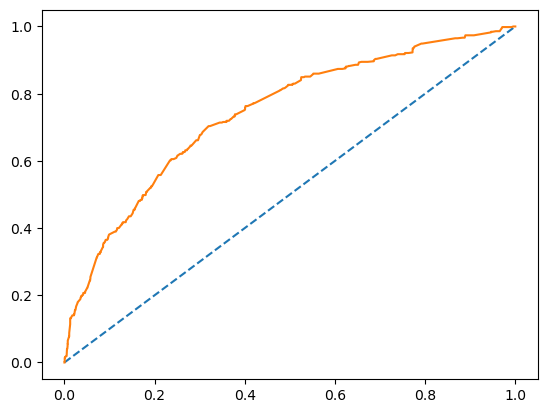

In [241]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs2 = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr2, test_tpr2, test_thresholds2 = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(test_fpr2, test_tpr2);

In [242]:
print("cross validation score for training dataset")
scores_lda_train = cross_val_score(lda, X_train, y_train, cv=10)
scores_lda_train

cross validation score for training dataset


array([0.83903676, 0.84537389, 0.85152284, 0.84263959, 0.84010152,
       0.85279188, 0.83756345, 0.82614213, 0.83756345, 0.84390863])

In [243]:
print("cross validation score for testing dataset")
scores_lda_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_lda_test

cross validation score for testing dataset


array([0.83136095, 0.84023669, 0.83727811, 0.84023669, 0.84911243,
       0.82840237, 0.83727811, 0.83431953, 0.83679525, 0.82789318])

### Parameter tunning: Building LDA model using GridSearchCV

In [246]:
# creating dataframe for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol' : [0.0001,0.0002,0.0003],
    'shrinkage' : ['auto', 'float', 'None'],
    
}

grid_search_lda = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [248]:
# fitting model into training dataset
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='f1')

In [250]:
# getting best parameters used out of all the combinations given in grid search
grid_search_lda.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [251]:
# getting best estimators
best_grid_lda = grid_search.best_estimator_

In [252]:
# predicting training and testing dataset
ytrain_predict_ldacv = best_grid_lda.predict(X_train)
ytest_predict_ldacv = best_grid_lda.predict(X_test)

In [253]:

#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid_lda.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8447094646028926


In [254]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid_lda.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8386619301361753


In [255]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_ldacv))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      6556
         1.0       0.63      0.18      0.28      1326

    accuracy                           0.84      7882
   macro avg       0.74      0.58      0.60      7882
weighted avg       0.82      0.84      0.81      7882



In [256]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldacv))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.58      0.17      0.26       570

    accuracy                           0.84      3378
   macro avg       0.71      0.57      0.58      3378
weighted avg       0.81      0.84      0.80      3378



In [257]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, ytrain_predict_ldacv)

confusuon matrix for training dataset


array([[6417,  139],
       [1085,  241]], dtype=int64)

In [258]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldacv)

confusuon matrix for testing dataset


array([[2738,   70],
       [ 475,   95]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.743


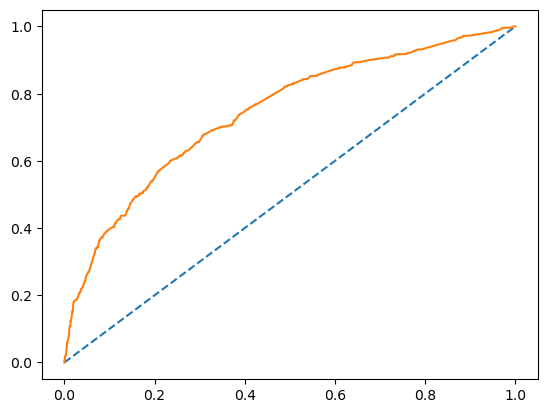

In [259]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = best_grid_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.740


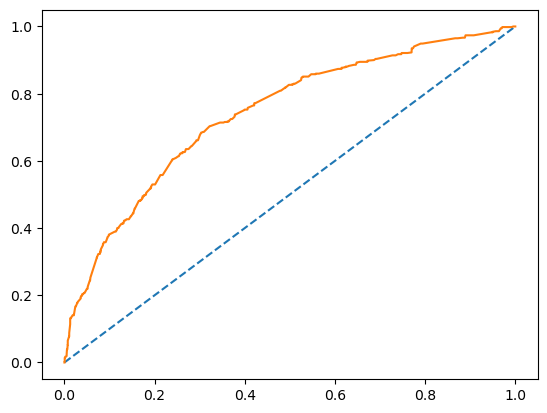

In [260]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = best_grid_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [261]:
print("cross validation scores for training dataset")
scores_ldacv_train = cross_val_score(best_grid_lda, X_train, y_train, cv=10)
scores_ldacv_train

cross validation scores for training dataset


array([0.84283904, 0.84537389, 0.85279188, 0.84771574, 0.84010152,
       0.85532995, 0.84390863, 0.82614213, 0.84137056, 0.84390863])

In [262]:
print("cross validation scores from testing dataset")
scores_ldacv_test = cross_val_score(best_grid_lda, X_test, y_test, cv=10)
scores_ldacv_test

cross validation scores from testing dataset


array([0.83136095, 0.84319527, 0.83431953, 0.84911243, 0.85798817,
       0.83136095, 0.84615385, 0.84023669, 0.83679525, 0.82492582])

### Building LDA model using SMOTE

In [263]:
#fitting model into training dataset
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [264]:
# predict on train and test data set with balanced dataset
ytrain_predict_ldasm = lda.predict(X_train_res) # can compare with y_train
ytest_predict_ldasm = lda.predict(X_test) # can compare with y_test

In [265]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",lda.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.6768608907870652


In [266]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",lda.score(X_test, y_test))

Accuracy of testing dataset: 0.6844286560094731


In [267]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_ldasm))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      6556
         1.0       0.68      0.67      0.67      6556

    accuracy                           0.68     13112
   macro avg       0.68      0.68      0.68     13112
weighted avg       0.68      0.68      0.68     13112



In [268]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldasm))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78      2808
         1.0       0.31      0.69      0.43       570

    accuracy                           0.68      3378
   macro avg       0.61      0.69      0.60      3378
weighted avg       0.81      0.68      0.72      3378



In [269]:
# confusion matrix for train dataset
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_ldasm)

confusion matrix for training dataset


array([[4493, 2063],
       [2174, 4382]], dtype=int64)

In [270]:
# confusion matrix for test dataset
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldasm)

confusion matrix for testing dataset


array([[1916,  892],
       [ 174,  396]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.744


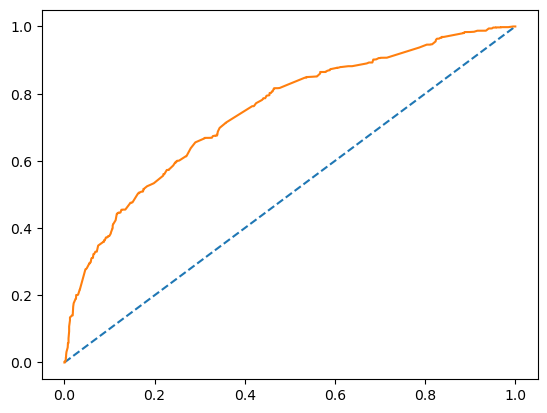

In [271]:
    # creating ROC curve and getting AUC score for train data set
    from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
    # predict probabilities
    probs = lda.predict_proba(X_train_res)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    print("AUC score and ROC curve for training dataset")
    auc = roc_auc_score(y_train_res, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.737


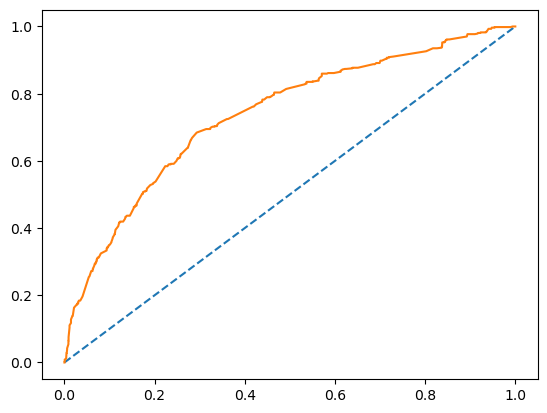

In [272]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [273]:
print("cross validation scores for training dataset")
scores_ldasm_train = cross_val_score(lda, X_train_res, y_train_res, cv=10)
scores_ldasm_train

cross validation scores for training dataset


array([0.66844512, 0.66158537, 0.67276888, 0.6720061 , 0.66742944,
       0.70022883, 0.66056445, 0.68344775, 0.68802441, 0.6849733 ])

In [274]:
print("cross validation scores for testing dataset")
scores_ldasm_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldasm_test

cross validation scores for testing dataset


array([0.83136095, 0.84023669, 0.83727811, 0.84023669, 0.84911243,
       0.82840237, 0.83727811, 0.83431953, 0.83679525, 0.82789318])

## Descison Tree

In [289]:
# building Decison Tree model
# Fit the model on original data
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Fit the Decison Tree model
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [290]:
# Training Data Class Prediction
ytrain_predict_dt = dt.predict(X_train)

# Test Data Class Prediction
ytest_predict_dt = dt.predict(X_test)

In [291]:
#Accuracy - Training Data
print("Accuracy of training dataset:",dt.score(X_train, y_train))

Accuracy of training dataset: 0.8697031210352703


In [292]:
# Accuracy - Test Data
print("Accuracy of testing dataset:",dt.score(X_test, y_test))

Accuracy of testing dataset: 0.8507992895204263


In [293]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
# confusion matrix for train data set
print("Confusion Matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_dt)

Confusion Matrix for train dataset


array([[6430,  126],
       [ 901,  425]], dtype=int64)

In [294]:
# confusion matrix for test data set
print("Confusion Matrix for test dataset")
confusion_matrix(y_test, ytest_predict_dt)

Confusion Matrix for test dataset


array([[2721,   87],
       [ 417,  153]], dtype=int64)

In [295]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_dt))


Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      6556
         1.0       0.77      0.32      0.45      1326

    accuracy                           0.87      7882
   macro avg       0.82      0.65      0.69      7882
weighted avg       0.86      0.87      0.85      7882



In [296]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_dt))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      2808
         1.0       0.64      0.27      0.38       570

    accuracy                           0.85      3378
   macro avg       0.75      0.62      0.65      3378
weighted avg       0.83      0.85      0.82      3378



AUC score and ROC curve for training dataset
AUC: 0.862


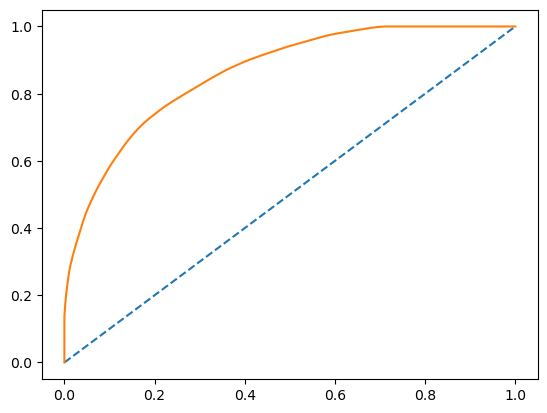

In [297]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.862


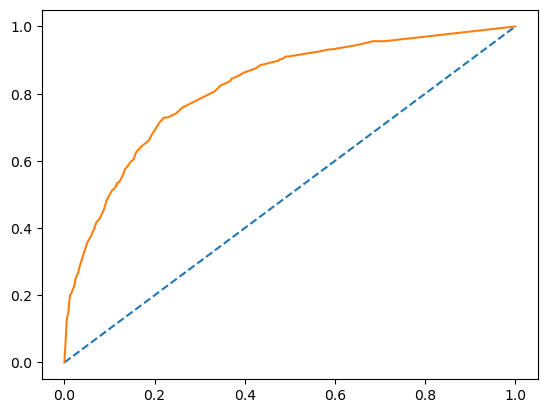

In [298]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [299]:
from sklearn.model_selection import cross_val_score
print("cross validation scroes for traning dataset")
scores_dt_train = cross_val_score(dt, X_train, y_train, cv=10)
scores_dt_train

cross validation scroes for traning dataset


array([0.85804816, 0.85678074, 0.86040609, 0.85152284, 0.84898477,
       0.87817259, 0.85406091, 0.85152284, 0.84517766, 0.84517766])

In [300]:
print("cross calidation scores for testing dataset")
scores_dt_test = cross_val_score(dt, X_test, y_test, cv=10)
scores_dt_test

cross calidation scores for testing dataset


array([0.83136095, 0.84615385, 0.84023669, 0.84911243, 0.84023669,
       0.82544379, 0.84911243, 0.84319527, 0.82195846, 0.83976261])

### Parameter tunning: Building Decison Tree (DT) model using GridSearchCV

In [314]:
# loading GridSearchCV and creating dataframe for parameters
from sklearn.model_selection import GridSearchCV
param_grid = { "criterion": ["gini", "entropy"], 
"max_depth": [3, 5, 7], 
"min_samples_split": [2, 5, 10], 
"min_samples_leaf": [1, 3, 5] }


grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')


In [315]:
# fitting grid search into traing dataset
grid_search_dt.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [316]:
# getting best parameters used out of all the combinations given in grid search
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [317]:
# getting best estimators
best_grid_dt = grid_search.best_estimator_

In [318]:
# predicting training and testing dataset
ytrain_predict_dtcv = best_grid_dt.predict(X_train)
ytest_predict_dtcv = best_grid_dt.predict(X_test)

In [319]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid_dt.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8447094646028926


In [320]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid_dt.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8386619301361753


In [321]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_dtcv))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      6556
         1.0       0.63      0.18      0.28      1326

    accuracy                           0.84      7882
   macro avg       0.74      0.58      0.60      7882
weighted avg       0.82      0.84      0.81      7882



In [322]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_dtcv))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.58      0.17      0.26       570

    accuracy                           0.84      3378
   macro avg       0.71      0.57      0.58      3378
weighted avg       0.81      0.84      0.80      3378



In [323]:
# confusion matrix of train dataset
print("confusion matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_dtcv)

confusion matrix for train dataset


array([[6417,  139],
       [1085,  241]], dtype=int64)

In [324]:
# confusion matrix of test dataset
print("confusion matrix for test dataset")
confusion_matrix(y_test, ytest_predict_dtcv)

confusion matrix for test dataset


array([[2738,   70],
       [ 475,   95]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.743


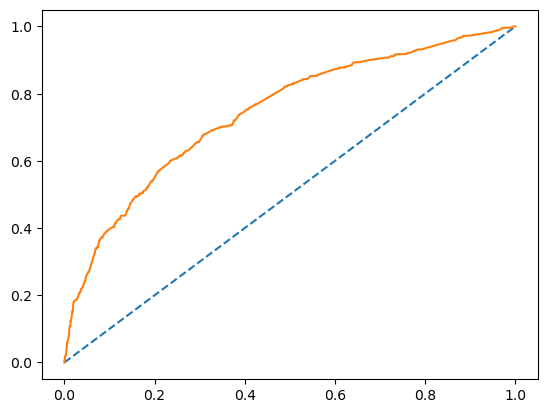

In [325]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = best_grid_dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC score and ROC curve for testing dataset
AUC: 0.740


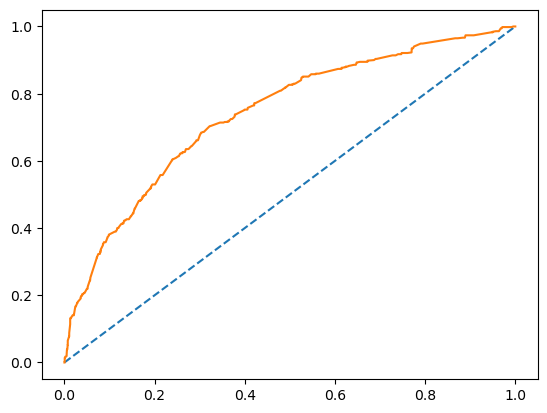

In [326]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = best_grid_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


In [327]:
print("cross validation score for training dataset")
scores_dtcv_train = cross_val_score(best_grid_dt, X_train, y_train, cv=10)
scores_dtcv_train

cross validation score for training dataset


array([0.84283904, 0.84537389, 0.85279188, 0.84771574, 0.84010152,
       0.85532995, 0.84390863, 0.82614213, 0.84137056, 0.84390863])

In [328]:
print("cross calidation score for testing dataset")
scores_dtcv_test = cross_val_score(best_grid_dt, X_test, y_test, cv=10)
scores_dtcv_test

cross calidation score for testing dataset


array([0.83136095, 0.84319527, 0.83431953, 0.84911243, 0.85798817,
       0.83136095, 0.84615385, 0.84023669, 0.83679525, 0.82492582])

### Building Decision model using SMOTE


In [301]:
#fitting model into training dataset
dt.fit(X_train_res, y_train_res)


DecisionTreeClassifier(random_state=1)

In [302]:
# predict on train and test data set with balanced dataset
ytrain_predict_dtsm = dt.predict(X_train_res) # can compare with y_train
ytest_predict_dtsm = dt.predict(X_test) # can compare with y_test

In [303]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",dt.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.7638041488712629


In [304]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",dt.score(X_test, y_test))

Accuracy of testing dataset: 0.7486678507992895


In [305]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_ldasm))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      6556
         1.0       0.68      0.67      0.67      6556

    accuracy                           0.68     13112
   macro avg       0.68      0.68      0.68     13112
weighted avg       0.68      0.68      0.68     13112



In [306]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldasm))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78      2808
         1.0       0.31      0.69      0.43       570

    accuracy                           0.68      3378
   macro avg       0.61      0.69      0.60      3378
weighted avg       0.81      0.68      0.72      3378



In [307]:
# confusion matrix for train dataset
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_ldasm)

confusion matrix for training dataset


array([[4493, 2063],
       [2174, 4382]], dtype=int64)

In [308]:
# confusion matrix for test dataset
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldasm)

confusion matrix for testing dataset


array([[1916,  892],
       [ 174,  396]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.857


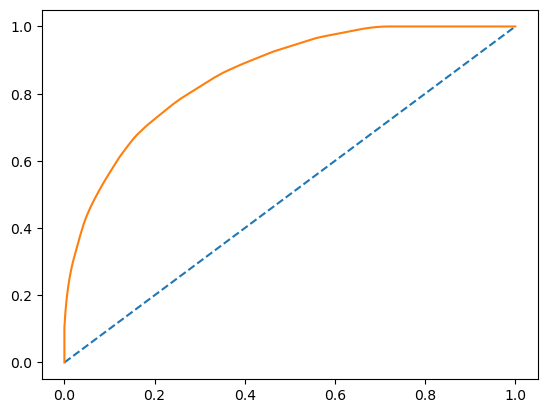

In [310]:
 # creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = dt.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC score and ROC curve for testing dataset
AUC: 0.814


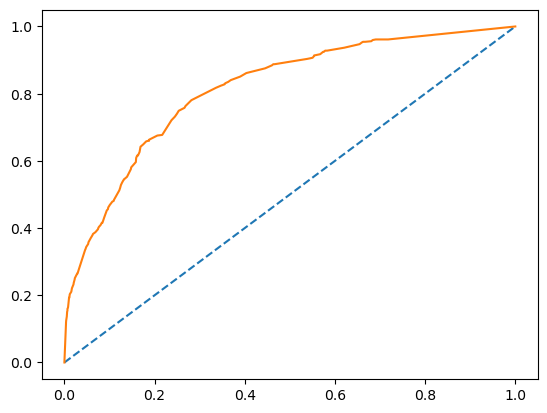

In [311]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [312]:
print("cross validation scores for training dataset")
scores_dtsm_train = cross_val_score(dt, X_train_res, y_train_res, cv=10)
scores_dtsm_train

cross validation scores for training dataset


array([0.74847561, 0.74618902, 0.74141876, 0.76048818, 0.74904653,
       0.7597254 , 0.73073989, 0.76048818, 0.76353928, 0.76353928])

In [313]:
print("cross validation scores for testing dataset")
scores_dtsm_test = cross_val_score(dt, X_test, y_test, cv=10)
scores_dtsm_test

cross validation scores for testing dataset


array([0.83136095, 0.84615385, 0.84023669, 0.84911243, 0.84023669,
       0.82544379, 0.84911243, 0.84319527, 0.82195846, 0.83976261])

## Building Random Forest Model (RF)

In [329]:
# building rando forect model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=1)
#fitting model into training dataset
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [331]:
# Performance Matrix on train data set
ytrain_predict_rf = rf.predict(X_train)
print("accuracy score for training dataset:",rf.score(X_train, y_train))
print('\n')

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_rf))
print('\n')

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_rf))
print('\n')

accuracy score for training dataset: 0.8697031210352703


confusion matrix for training dataset
[[6427  129]
 [ 898  428]]


classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      6556
         1.0       0.77      0.32      0.45      1326

    accuracy                           0.87      7882
   macro avg       0.82      0.65      0.69      7882
weighted avg       0.86      0.87      0.85      7882





In [332]:
# Performance Matrix on test data set
ytest_predict_rf = rf.predict(X_test)
print("accuracy score for testing dataset:",rf.score(X_test, y_test))
print('\n')

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rf))
print('\n')

print("classification report for testing dataste")
print(metrics.classification_report(y_test, ytest_predict_rf))
print('\n')

accuracy score for testing dataset: 0.8522794552989935


confusion matrix for testing dataset
[[2727   81]
 [ 418  152]]


classification report for testing dataste
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      2808
         1.0       0.65      0.27      0.38       570

    accuracy                           0.85      3378
   macro avg       0.76      0.62      0.65      3378
weighted avg       0.83      0.85      0.83      3378





AUC score and ROC curve for training dataset
AUC: 0.860


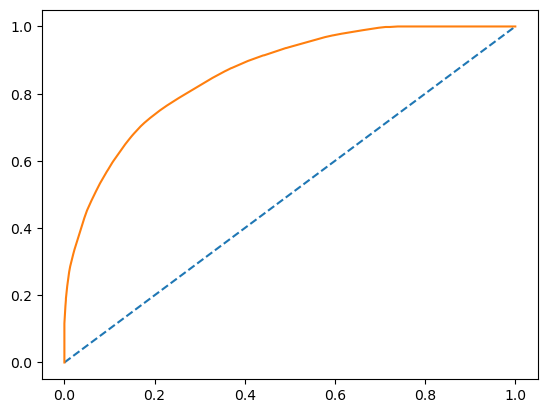

In [334]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.820


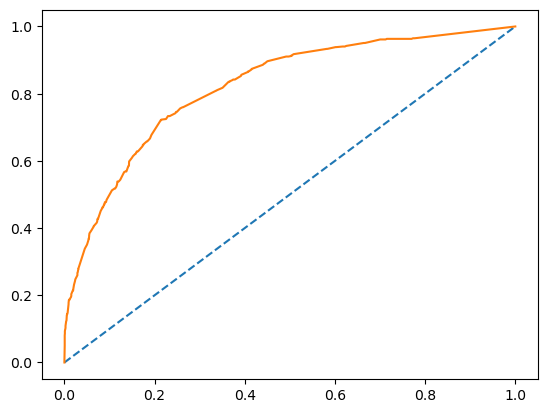

In [336]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Building random forest model over balanced dataset

In [337]:
#fitting model into training dataset
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=1)

In [338]:
# Performance Matrix on train data set
ytrain_predict_rfsm = rf.predict(X_train_res)
print("accuracy score for training dataset:",rf.score(X_train_res, y_train_res))
print('\n')

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_rfsm))
print('\n')

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_rfsm))
print('\n')

accuracy score for training dataset: 0.7638041488712629


confusion matrix for training dataset
[[4947 1609]
 [1488 5068]]


classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      6556
         1.0       0.76      0.77      0.77      6556

    accuracy                           0.76     13112
   macro avg       0.76      0.76      0.76     13112
weighted avg       0.76      0.76      0.76     13112





In [339]:
# Performance Matrix on test data set
ytest_predict_rfsm = rf.predict(X_test)
print("accuracy score for testing dataset:",rf.score(X_test, y_test))
print('\n')

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rfsm))
print('\n')

print("classification report for testing dataste")
print(metrics.classification_report(y_test, ytest_predict_rfsm))
print('\n')

accuracy score for testing dataset: 0.7513321492007105


confusion matrix for testing dataset
[[2111  697]
 [ 143  427]]


classification report for testing dataste
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83      2808
         1.0       0.38      0.75      0.50       570

    accuracy                           0.75      3378
   macro avg       0.66      0.75      0.67      3378
weighted avg       0.84      0.75      0.78      3378





## KNN Model

In [380]:
# building KNN model using the default hyper-parameter
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [381]:
## Performance Matrix on train data set
ytrain_predict_knn = knn.predict(X_train)
print("Accracy of training dataset:", knn.score(X_train, y_train))

Accracy of training dataset: 0.8577772139051002


In [382]:
print("confusion matrix of training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_knn))

confusion matrix of training dataset
[[6260  296]
 [ 825  501]]


In [383]:
print("classificatoin report of training dataset")
print (classification_report(y_train, ytrain_predict_knn))

classificatoin report of training dataset
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      6556
         1.0       0.63      0.38      0.47      1326

    accuracy                           0.86      7882
   macro avg       0.76      0.67      0.69      7882
weighted avg       0.84      0.86      0.84      7882



In [384]:
# Performance Matrix on test data set
ytest_predict_knn = knn.predict(X_test)
print("accuracy for testing dataset", knn.score(X_test, y_test))

accuracy for testing dataset 0.8439905269390172


In [385]:
print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_knn))

confusion matrix for testing dataset
[[2665  143]
 [ 384  186]]


In [386]:
print("classsification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_knn))

classsification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2808
         1.0       0.57      0.33      0.41       570

    accuracy                           0.84      3378
   macro avg       0.72      0.64      0.66      3378
weighted avg       0.82      0.84      0.83      3378



AUC score and ROC curve for training dataset
AUC: 0.782


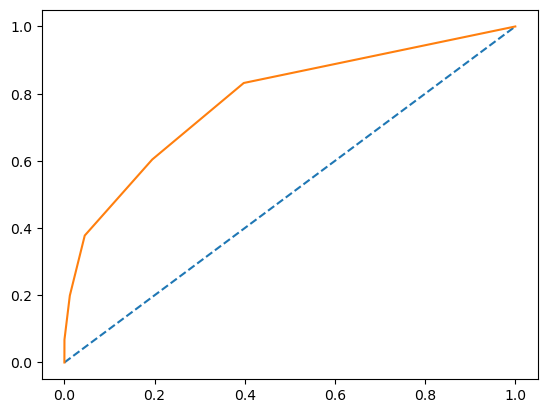

In [388]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.740


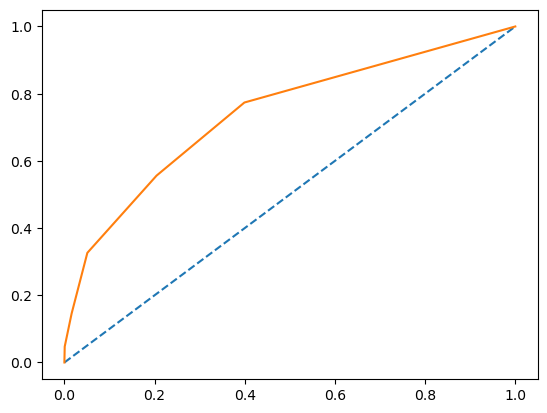

In [389]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [390]:
print("cross validation scores for train dataset")
scores_knn_train = cross_val_score(knn, X_train, y_train, cv=10)
scores_knn_train

cross validation scores for train dataset


array([0.83903676, 0.85931559, 0.84137056, 0.84137056, 0.81345178,
       0.87309645, 0.85786802, 0.83248731, 0.85279188, 0.84263959])

In [391]:
print("cross validation scores for test dataset")
scores_knn_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knn_test

cross validation scores for test dataset


array([0.84911243, 0.82248521, 0.80769231, 0.84615385, 0.81065089,
       0.79289941, 0.82840237, 0.83431953, 0.82195846, 0.81008902])

### Finding the right value for n_neighbor

In [392]:
# getting the ideal number of value of "N"
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.21551213735938424,
 0.15926583777383063,
 0.15600947306098278,
 0.15630550621669625,
 0.15600947306098278,
 0.1577856719952635,
 0.15808170515097686,
 0.1613380698638247,
 0.1613380698638247,
 0.16163410301953818]

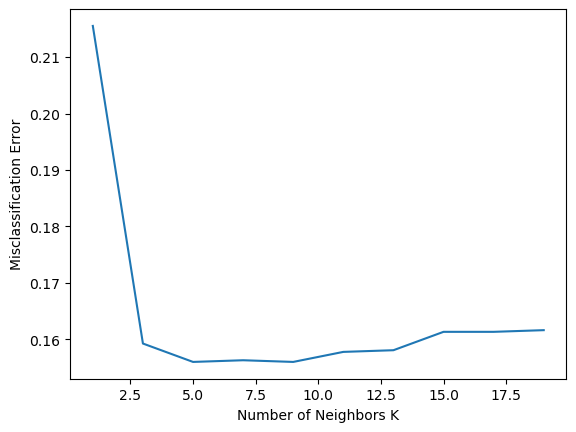

In [393]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [394]:
#from sklearn.neighbors import KNeighborsClassifier

knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [396]:
# Performance Matrix on train data set
ytrain_predict_knn5 = knn5.predict(X_train)
print("accuracy for training dataset:",knn5.score(X_train, y_train))
print('\n')

print("confusion matrix for training dataset")
print(confusion_matrix(y_train, ytrain_predict_knn5))
print('\n')

print("classification report for training dataset")
print(classification_report(y_train, ytrain_predict_knn5))
print('\n')

accuracy for training dataset: 0.8577772139051002


confusion matrix for training dataset
[[6260  296]
 [ 825  501]]


classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      6556
         1.0       0.63      0.38      0.47      1326

    accuracy                           0.86      7882
   macro avg       0.76      0.67      0.69      7882
weighted avg       0.84      0.86      0.84      7882





In [397]:
# Performance Matrix on test data set
ytest_predict_knn5 = knn5.predict(X_test)
print("accuracy score for testing dataset:",knn5.score(X_test, y_test))
print('\n')

print("confusion matrix for testing dataset")
print(confusion_matrix(y_test, ytest_predict_knn5))
print('\n')

print("classification report for testing dataset")
print(classification_report(y_test, ytest_predict_knn5))
print('\n')

accuracy score for testing dataset: 0.8439905269390172


confusion matrix for testing dataset
[[2665  143]
 [ 384  186]]


classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2808
         1.0       0.57      0.33      0.41       570

    accuracy                           0.84      3378
   macro avg       0.72      0.64      0.66      3378
weighted avg       0.82      0.84      0.83      3378





AUC score and ROC curve for training dataset
AUC: 0.782


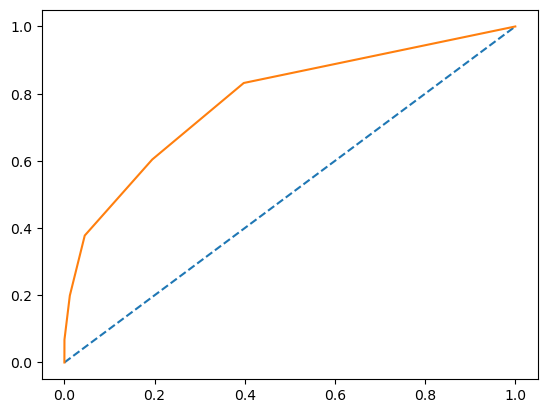

In [398]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = knn5.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.740


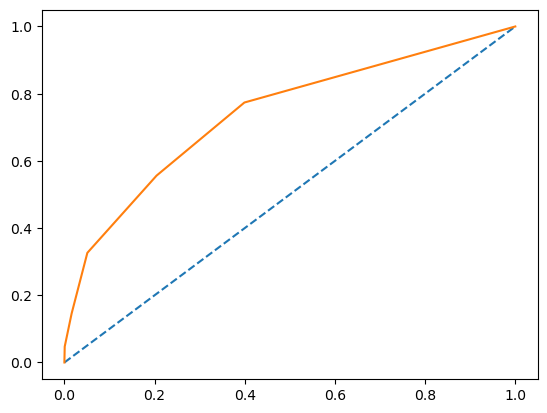

In [399]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = knn5.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [400]:
print("cross validation scores for training dataset")
scores_knn5_train = cross_val_score(knn5, X_train, y_train, cv=10)
scores_knn5_train

cross validation scores for training dataset


array([0.83903676, 0.85931559, 0.84137056, 0.84137056, 0.81345178,
       0.87309645, 0.85786802, 0.83248731, 0.85279188, 0.84263959])

In [401]:
print("cross validation scores for testing dataset")
scores_knn5_test = cross_val_score(knn5, X_test, y_test, cv=10)
scores_knn5_test

cross validation scores for testing dataset


array([0.84911243, 0.82248521, 0.80769231, 0.84615385, 0.81065089,
       0.79289941, 0.82840237, 0.83431953, 0.82195846, 0.81008902])

### Building KNN model using GridSearchCV


In [402]:
param_grid_knn = {
    'n_neighbors': [5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    
}

grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 10, n_jobs=-1,scoring='f1')

In [403]:
# fitting gridsearchCV into training dataset
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [404]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [405]:
# getting best estimators
best_grid_knn = grid_search.best_estimator_

In [406]:
ytrain_predict_knncv = best_grid_knn.predict(X_train)
ytest_predict_knncv = best_grid_knn.predict(X_test)

In [407]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid_knn.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8447094646028926


In [408]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid_knn.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8386619301361753


In [409]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_knncv))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      6556
         1.0       0.63      0.18      0.28      1326

    accuracy                           0.84      7882
   macro avg       0.74      0.58      0.60      7882
weighted avg       0.82      0.84      0.81      7882



In [410]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_knncv))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2808
         1.0       0.58      0.17      0.26       570

    accuracy                           0.84      3378
   macro avg       0.71      0.57      0.58      3378
weighted avg       0.81      0.84      0.80      3378



In [411]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, ytrain_predict_knncv)

confusuon matrix for training dataset


array([[6417,  139],
       [1085,  241]], dtype=int64)

In [412]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_knncv)

confusuon matrix for testing dataset


array([[2738,   70],
       [ 475,   95]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.743


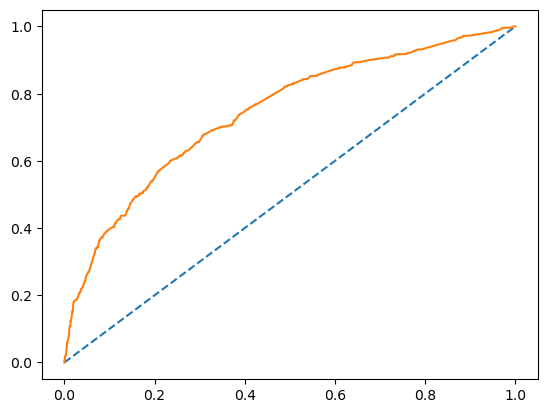

In [413]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = best_grid_knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.740


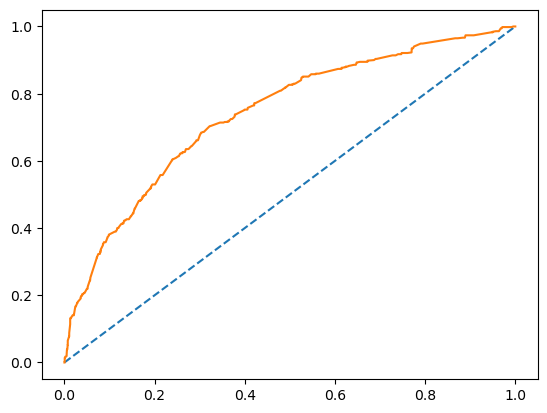

In [414]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = best_grid_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [415]:
print("cross validation scores for train dataset")
scores_knncv_train = cross_val_score(best_grid_knn, X_train, y_train, cv=10)
scores_knncv_train

cross validation scores for train dataset


array([0.84283904, 0.84537389, 0.85279188, 0.84771574, 0.84010152,
       0.85532995, 0.84390863, 0.82614213, 0.84137056, 0.84390863])

In [416]:
print("cross validation scores for test dataset")
scores_knncv_test = cross_val_score(best_grid_knn, X_test, y_test, cv=10)
scores_knncv_test

cross validation scores for test dataset


array([0.83136095, 0.84319527, 0.83431953, 0.84911243, 0.85798817,
       0.83136095, 0.84615385, 0.84023669, 0.83679525, 0.82492582])

### Building KNN model over balanced dataset using SMOTE

In [417]:
#fitting model into training dataset
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=19)

In [418]:
# predict on train and test data set with balanced dataset
ytrain_predict_knnsm = knn.predict(X_train_res) # can compare with y_train
ytest_predict_knnsm = knn.predict(X_test) # can compare with y_test

In [419]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",knn.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.74633923123856


In [420]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",knn.score(X_test, y_test))

Accuracy of testing dataset: 0.7110716400236826


In [421]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_knnsm))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      6556
         1.0       0.73      0.77      0.75      6556

    accuracy                           0.75     13112
   macro avg       0.75      0.75      0.75     13112
weighted avg       0.75      0.75      0.75     13112



In [422]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_knnsm))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.80      2808
         1.0       0.33      0.72      0.46       570

    accuracy                           0.71      3378
   macro avg       0.63      0.72      0.63      3378
weighted avg       0.83      0.71      0.74      3378



In [423]:
# confusion matrix for train dataset
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_knnsm)

confusion matrix for training dataset


array([[4726, 1830],
       [1496, 5060]], dtype=int64)

In [424]:
# confusion matrix for test dataset
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_knnsm)

confusion matrix for testing dataset


array([[1990,  818],
       [ 158,  412]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.820


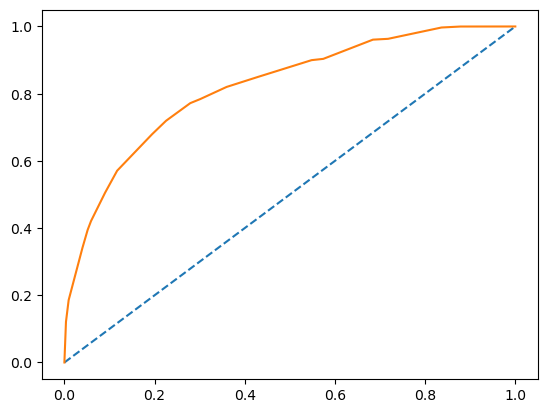

In [425]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.790


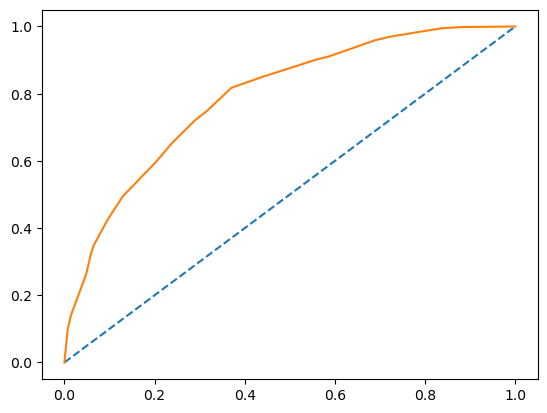

In [426]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [427]:
print("cross validation scores for train dataset")
scores_knnsm_train = cross_val_score(knn, X_train_res, y_train_res, cv=10)
scores_knnsm_train

cross validation scores for train dataset


array([0.72637195, 0.72637195, 0.7208238 , 0.72921434, 0.72845156,
       0.74370709, 0.72006102, 0.73836766, 0.72158658, 0.74752098])

In [428]:
print("cross validation scores for test dataset")
scores_knnsm_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knnsm_test

cross validation scores for test dataset


array([0.84615385, 0.83727811, 0.84023669, 0.83727811, 0.83431953,
       0.84023669, 0.83136095, 0.83136095, 0.83679525, 0.83086053])

## Bagging

In [340]:
from sklearn.ensemble import BaggingClassifier
Bagging=BaggingClassifier(base_estimator=rf,random_state=1)
#fitting model into training dataset
Bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [341]:
# Performance Matrix on train data set
ytrain_predict_bagging = Bagging.predict(X_train)
print("accuracy score or training dataset:",Bagging.score(X_train, y_train))
print('\n')

print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_bagging))
print('\n')

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_bagging))
print('\n')

accuracy score or training dataset: 0.8679269221009897


confusion report for training dataset
[[6449  107]
 [ 934  392]]


classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.93      6556
         1.0       0.79      0.30      0.43      1326

    accuracy                           0.87      7882
   macro avg       0.83      0.64      0.68      7882
weighted avg       0.86      0.87      0.84      7882





In [342]:
# Performance Matrix on test data set
ytest_predict_bagging = Bagging.predict(X_test)
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))
print('\n')

print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging))
print('\n')

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging))
print('\n')

Accuracy score for testing datatset: 0.85198342214328


confusuion matrix for testing dataset
[[2740   68]
 [ 432  138]]


classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      2808
         1.0       0.67      0.24      0.36       570

    accuracy                           0.85      3378
   macro avg       0.77      0.61      0.64      3378
weighted avg       0.83      0.85      0.82      3378





AUC score and ROC curve for training dataset
AUC: 0.857


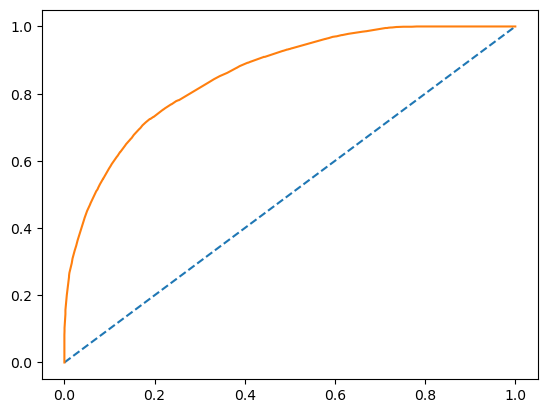

In [344]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.817


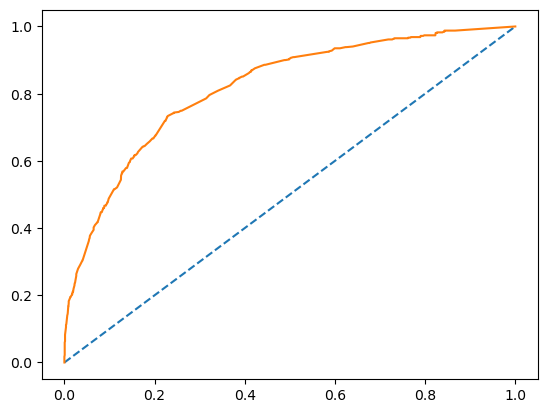

In [345]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [346]:
print("cross validation scores for train dataset")
scores_bagging_train = cross_val_score(Bagging, X_train, y_train, cv=10)
#fitting model into training dataset
scores_bagging_train

cross validation scores for train dataset


array([0.85424588, 0.8643853 , 0.86040609, 0.85406091, 0.85025381,
       0.87563452, 0.85025381, 0.85279188, 0.84390863, 0.84390863])

In [347]:
print("cross validation scores for test dataset")
scores_bagging_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_test

cross validation scores for test dataset


array([0.84023669, 0.85207101, 0.83727811, 0.84911243, 0.84615385,
       0.84023669, 0.85798817, 0.84615385, 0.82195846, 0.82492582])

### Bagging on balanced dataset (SMOTE)

In [348]:
#fitting model into training dataset
Bagging.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [349]:
# Performance Matrix on train data set
ytrain_predict_bagging_sm = Bagging.predict(X_train_res)
print("accuracy score or training dataset:",Bagging.score(X_train_res, y_train_res))
print('\n')

print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_bagging_sm))
print('\n')

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_bagging_sm))
print('\n')

accuracy score or training dataset: 0.7632702867602197


confusion report for training dataset
[[4906 1650]
 [1454 5102]]


classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      6556
         1.0       0.76      0.78      0.77      6556

    accuracy                           0.76     13112
   macro avg       0.76      0.76      0.76     13112
weighted avg       0.76      0.76      0.76     13112





In [350]:
# Performance Matrix on test data set
ytest_predict_bagging_sm= Bagging.predict(X_test)
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))
print('\n')

print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging_sm))
print('\n')

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging_sm))
print('\n')

Accuracy score for testing datatset: 0.7454114860864417


confusuion matrix for testing dataset
[[2087  721]
 [ 139  431]]


classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83      2808
         1.0       0.37      0.76      0.50       570

    accuracy                           0.75      3378
   macro avg       0.66      0.75      0.66      3378
weighted avg       0.84      0.75      0.77      3378





AUC score and ROC curve for training dataset
AUC: 0.856


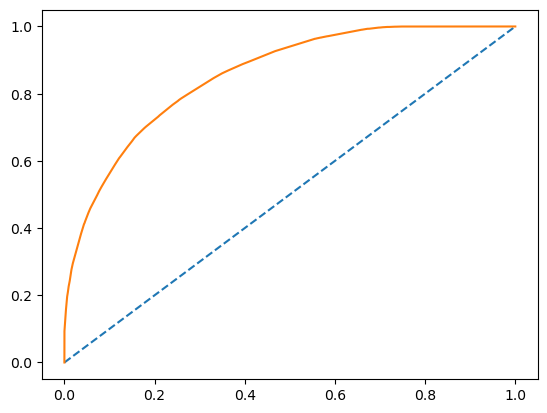

In [351]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.819


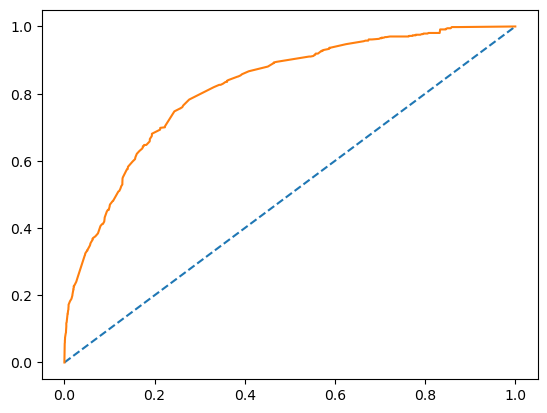

In [352]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [353]:
print("cross validation scores for train dataset")
scores_bagging_sm_train = cross_val_score(Bagging, X_train_res, y_train_res, cv=10)
scores_bagging_sm_train

cross validation scores for train dataset


array([0.7492378 , 0.75304878, 0.74370709, 0.75591152, 0.75209764,
       0.76125095, 0.73760488, 0.75743707, 0.76506484, 0.75819985])

In [354]:
print("cross validation scores for test dataset")
scores_bagging_sm_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_sm_test

cross validation scores for test dataset


array([0.84023669, 0.85207101, 0.83727811, 0.84911243, 0.84615385,
       0.84023669, 0.85798817, 0.84615385, 0.82195846, 0.82492582])

## Ada-Boost

In [355]:
from sklearn.ensemble import AdaBoostClassifier


adb = AdaBoostClassifier(random_state=1)
#fitting model into training dataset
adb.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [356]:
# Performance Matrix on train data set
ytrain_predict_adb = adb.predict(X_train)

print("Accuracy for training dataset:",adb.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_adb))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_adb))

Accuracy for training dataset: 0.8400152245622938
confusion matrix for training dataset
[[6467   89]
 [1172  154]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      6556
         1.0       0.63      0.12      0.20      1326

    accuracy                           0.84      7882
   macro avg       0.74      0.55      0.55      7882
weighted avg       0.81      0.84      0.79      7882



In [357]:
# Performance Matrix on test data set
ytest_predict_adb = adb.predict(X_test)
print("accuracy score for testing dataset:",adb.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_adb))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_adb))

accuracy score for testing dataset: 0.8410301953818827
confusion matrix for testing dataset
[[2770   38]
 [ 499   71]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      2808
         1.0       0.65      0.12      0.21       570

    accuracy                           0.84      3378
   macro avg       0.75      0.56      0.56      3378
weighted avg       0.81      0.84      0.79      3378



AUC score and ROC curve for training dataset
AUC: 0.744


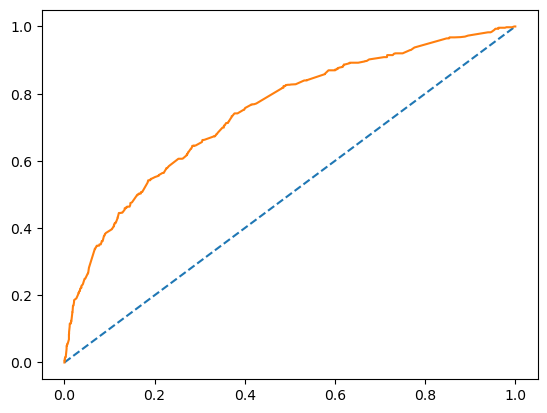

In [359]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.741


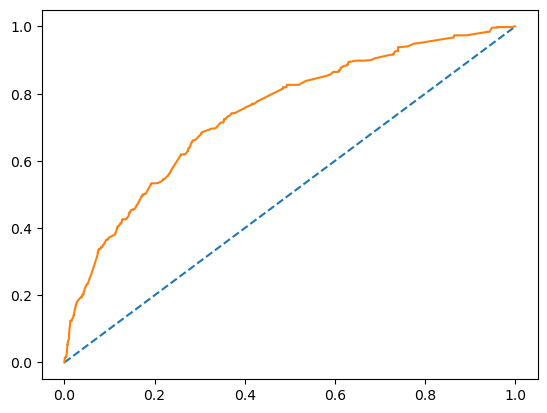

In [360]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [361]:
print("cross validation scores for train dataset")
scores_adb_train = cross_val_score(adb, X_train, y_train, cv=10)
scores_adb_train

cross validation scores for train dataset


array([0.8365019 , 0.84030418, 0.84517766, 0.84390863, 0.83883249,
       0.84517766, 0.83629442, 0.82994924, 0.83375635, 0.84390863])

In [362]:
print("cross validation scores for test dataset")
scores_adb_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_test

cross validation scores for test dataset


array([0.82248521, 0.82544379, 0.83727811, 0.84023669, 0.84023669,
       0.82544379, 0.83431953, 0.84023669, 0.83679525, 0.84272997])

### Ada-Boost on balanced dataset(SMOTE)

In [363]:
#fitting model into training dataset
adb.fit(X_train_res,y_train_res)

AdaBoostClassifier(random_state=1)

In [365]:
# Performance Matrix on train data set
ytrain_predict_gbsm = adb.predict(X_train_res)
print("accuracy for training dataset:", adb.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_gbsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_gbsm))

accuracy for training dataset: 0.6712934716290421
confusion matrix for training dataset
[[4420 2136]
 [2174 4382]]
classification report for training dataset
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67      6556
         1.0       0.67      0.67      0.67      6556

    accuracy                           0.67     13112
   macro avg       0.67      0.67      0.67     13112
weighted avg       0.67      0.67      0.67     13112



In [366]:
# Performance Matrix on test data set
ytest_predict_gbsm = adb.predict(X_test)
print("accuracy score for testing dataset:", adb.score(X_test, y_test))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_gbsm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_gbsm))

accuracy score for testing dataset: 0.6782119597394908
confusuon matrix for testing dataset
[[1894  914]
 [ 173  397]]
classification report for testing dataset
              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78      2808
         1.0       0.30      0.70      0.42       570

    accuracy                           0.68      3378
   macro avg       0.61      0.69      0.60      3378
weighted avg       0.81      0.68      0.72      3378



AUC score and ROC curve for training dataset
AUC: 0.743


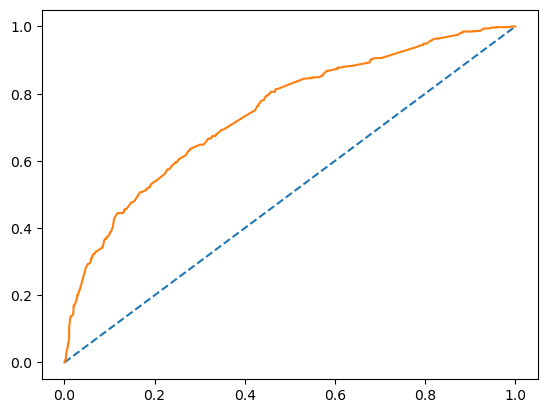

In [368]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.734


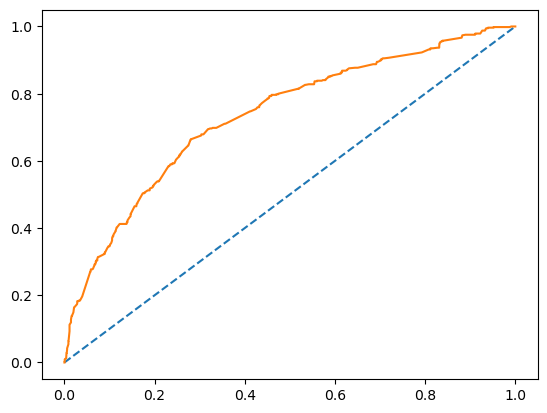

In [370]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [371]:
print("cross validation scores for train dataset")
scores_adb_sm_train = cross_val_score(adb, X_train_res, y_train_res, cv=10)
scores_adb_sm_train

cross validation scores for train dataset


array([0.66387195, 0.65167683, 0.66666667, 0.66819222, 0.65827613,
       0.69870328, 0.65751335, 0.68421053, 0.68421053, 0.6849733 ])

In [372]:
print("cross validation scores for test dataset")
scores_adb_sm_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_sm_test

cross validation scores for test dataset


array([0.82248521, 0.82544379, 0.83727811, 0.84023669, 0.84023669,
       0.82544379, 0.83431953, 0.84023669, 0.83679525, 0.84272997])